# <font color=green> LEAD SCORING ~ X Education [GROUP CASE STUDY]</font><br>
## <mark><font color=blue> LOGISTIC REGRESSION MODEL</font></mark><br>



### **<font color=brown> - By: Vandit Sardana | Saras Sangle | Santosh</font>**<br>



### Problem Statement

An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses, fill up a form for the course, or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. The typical lead conversion rate at X education is around 30%, and the CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.


                                                    ***


# **<font color=brown>1. UNDERSTANDING THE DATA </font>**

## 1.1 Import Libraries, Suppress Warnings and Set Display

In [1]:
#import required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

#scipy libraries
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

In [2]:
#supress warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Environment settings

pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
pd.set_option('display.width',None)

## 1.2 Reading the Data 📖

In [4]:
# Reading the dataset
df_leads = pd.read_csv("Leads.csv")

In [5]:
df_leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
df_leads.shape

(9240, 37)

**<font color=blue> NOTE: </font>**The original dataframe has 9240 rows and 37 columns

## 1.3 Data Analysis

In [7]:
# Check summary of all numerical columns

df_leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [8]:
# checking number of unique values in each column

df_leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Check data types of columns and nulls

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

**<font color=blue> NOTE: </font>**There are **`null values`** in the dataframe

In [10]:
#Checking for count of missing values in each column

df_leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

**<font color=blue> NOTE: </font>**There are various columns that contains high number of missing/null values in the dataframe.

In [11]:
# Check for duplicate rows

print(df_leads.duplicated().sum())

0


**<font color=blue> NOTE: </font>**There are no duplicates in the dataframe.

# **<font color=brown>2. DATA CLEANING </font>**

## 2.1 Treatment for 'Select' values

As mentioned in the Problem Statement, many of the categorical variables have a level called **`'Select'`** **which needs to be handled because it is as good as a null value.** One of the reason might be is that the customer did not select any option from the list and hence for such columns the data remained as default 'Select' for Select. 

In [12]:
# List of columns having 'Select' as value

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

['Specialization', 'How did you hear about X Education', 'Lead Profile', 'City']


In [13]:
# Converting 'Select' values to NaN.

df_leads = df_leads.replace('Select', np.nan)

In [14]:
# Checking if all 'Select' values have been handled in the columns

cols_with_select_value = [col for col in df_leads.columns if len(df_leads[col].isin(['Select']).unique())>1]
print(cols_with_select_value)

[]


**<font color=blue> NOTE: </font>**Now, there are no `'Select'` values in the dataframe.

## 2.2 Treatment for the columns in the dataframe which are to be filled by the 'Sales Team'

**Dropping the below columns as these columns are to be filled by 'Sales Team' post evaluating this model**

- Prospect ID
- Lead Number
- Tags
- Lead Quality
- Lead Profile
- Asymmetrique Activity Index
- Asymmetrique Profile Index
- Asymmetrique Activity Score
- Asymmetrique Profile Score 
- Last Notable Activity

In [15]:
#Dropping all above-mentioned columns in the dataframe.
df_leads.drop(['Prospect ID','Lead Number','Tags','Lead Quality','Lead Profile','Asymmetrique Activity Index','Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Last Notable Activity'],axis=1,inplace=True)

## 2.3 Handling Missing Values

In [16]:
# Calculating Missing Values Percentage

missingvalues=round((df_leads.isna().mean()).sort_values(ascending=False)*100,0)
print(missingvalues)

How did you hear about X Education               78.0
City                                             40.0
Specialization                                   37.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Lead Source                                       0.0
Newspaper                                         0.0
Update me on Supply Chain Content                 0.0
Get updates on DM Content                         0.0
I agree to pay the amount through cheque          0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Lead Origin                                       0.0
X Education Forums          

### 2.3.1 Drop Columns having atleast 40% Null Values

In [17]:
#Checking columns having null value greater than or equal to 40%

print(missingvalues[missingvalues >= 40])

How did you hear about X Education    78.0
City                                  40.0
dtype: float64


In [18]:
# Dropping all columns having a missing value percentage of atleast 40%.
df_leads = df_leads.drop(df_leads.loc[:,list((round((df_leads.isna().mean())*100,0)>=40))].columns, 1)

In [19]:
# Calculating Missing Values Percentage

missingvalues=round((df_leads.isna().mean()).sort_values(ascending=False)*100,0)
print(missingvalues)

Specialization                                   37.0
What matters most to you in choosing a course    29.0
What is your current occupation                  29.0
Country                                          27.0
TotalVisits                                       1.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Lead Source                                       0.0
X Education Forums                                0.0
I agree to pay the amount through cheque          0.0
Get updates on DM Content                         0.0
Update me on Supply Chain Content                 0.0
Receive More Updates About Our Courses            0.0
Through Recommendations                           0.0
Digital Advertisement                             0.0
Newspaper                                         0.0
Lead Origin                                       0.0
Newspaper Article                                 0.0
Magazine                    

In [20]:
#Checking the shape post dropping the columns.

df_leads.shape

(9240, 25)

### 2.3.2 Columns with Categorical Data

In [21]:
# Select the columns with non-numeric data type

cat_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(cat_cols)

['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']


**<font color=blue> NOTE: </font>**Approach would be to check the count of values in each categorical column and then do the missing value treatment.

In [22]:
for i in cat_cols:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Lead Source 

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.0108

### 2.3.3 Drop Highly Skewed Columns

**To treat the data imbalance in the dataset, following columns need to be dropped:**

- Do Not Email
- Do Not Call
- Country 
- What matters most to you in choosing a course 
- Search
- Magazine
- Newspaper Article  
- X Education Forums
- Newspaper
- Digital Advertisement 
- Through Recommendations
- Receive More Updates About Our Courses 
- Update me on Supply Chain Content
- Get updates on DM Content 
- I agree to pay the amount through cheque

In [23]:
#Using drop to remove columns with high data imbalance

df_leads.drop(['Do Not Email','Do Not Call','Country','What matters most to you in choosing a course', 
'Search','Magazine','Newspaper Article', 'X Education Forums','Newspaper','Digital Advertisement','Through Recommendations',
'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content', 
'I agree to pay the amount through cheque'],axis=1,inplace=True)

In [24]:
#Checking the shape post dropping the columns.

df_leads.shape

(9240, 10)

In [25]:
#Checking uniqueness in all categorical variables

cat_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
for i in cat_cols:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Lead Source 

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Press_Release         0.021730
Social Media          0.021730
Live Chat             0.021730
youtubechannel        0.010865
testone               0.010865
Pay per Click Ads     0.010865
welearnblog_Home      0.010865
WeLearn               0.0108

### 2.3.4 Merging categories having low values

In [26]:
#Combining categories with very low row percentages as it does not make sense to create dummies for such rows.

#Lead Origin
df_leads['Lead Origin'] = df_leads['Lead Origin'].replace(['Lead Import','Quick Add Form'] ,'Others')

#Lead Source
df_leads['Lead Source'] = df_leads['Lead Source'].replace(['Facebook','bing','Click2call', 
                                                   'Press_Release','Social Media','Live Chat','Pay per Click Ads','blog',
                                                   'WeLearn','youtubechannel','testone','NC_EDM' ,'welearnblog_Home'] ,'Others')

# Changing google to Google in 'Lead Source' column
df_leads['Lead Source'] = df_leads['Lead Source'].replace("google","Google")

#Last Activity
df_leads['Last Activity']=df_leads['Last Activity'].replace(['Unsubscribed','Had a Phone Conversation','Approached upfront',
                                                     'View in browser link Clicked','Email Received','Email Marked Spam',
                                                     'Visited Booth in Tradeshow','Resubscribed to emails'],'Others')

#Specialization
df_leads['Specialization']=df_leads['Specialization'].replace(['Rural and Agribusiness','E-Business','Services Excellence',
                                                       'Hospitality Management','E-COMMERCE','Retail Management'],'Others')

#Current Occupation
df_leads['What is your current occupation']=df_leads['What is your current occupation'].replace(['Other','Housewife','Businessman'],'Others')

In [27]:
#Rechecking to find if the categories are correctly combined.

cat_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()
for i in cat_cols:
        perc=100*df_leads[i].value_counts(normalize=True)
        print("value_counts % for :",i,"\n")
        print(perc,"\n")
        print("___"*40,"\n")

value_counts % for : Lead Origin 

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Others                      0.606061
Name: Lead Origin, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Lead Source 

Google              31.214689
Direct Traffic      27.629292
Olark Chat          19.067797
Organic Search      12.538027
Reference            5.801825
Welingak Website     1.542807
Referral Sites       1.358105
Others               0.847458
Name: Lead Source, dtype: float64 

________________________________________________________________________________________________________________________ 

value_counts % for : Last Activity 

Email Opened                 37.616285
SMS Sent                     30.042684
Olark Chat Conversation      10.649010
Page Visited on Website       7.004487
Converted to Lead             4

In [28]:
# Calculating Missing Values Percentage

missingvalues=round((df_leads.isna().mean()).sort_values(ascending=False)*100,2)
print(missingvalues)

Specialization                            36.58
What is your current occupation           29.11
TotalVisits                                1.48
Page Views Per Visit                       1.48
Last Activity                              1.11
Lead Source                                0.39
Lead Origin                                0.00
Converted                                  0.00
Total Time Spent on Website                0.00
A free copy of Mastering The Interview     0.00
dtype: float64


#### Insights:

- **<font color=blue> Specialization: </font>** Specialization has 36.58 % missing values. The specialization selected is evenly distributed. Hence imputation or dropping is not a good choice. We need to create additional category called `'Not Specified'`. 

- **<font color=blue>What is your current occupation:</font>** We can impute the missing values with `'Unemployed'` as it has the most values (Mode). This seems to be a important variable from business context, since X Education sells online courses and unemployed people might take this course to increase their chances of getting employed. 

- **<font color=blue>Last Activity:</font>** `"Email Opened"` is having highest number of values and overall missing values in this column is just 1.11%, hence we will impute the missing values with the "mode" label `'Email Opened'`.

- **<font color=blue>Lead Source:</font>** `"Google"` is having highest number of occurences and overall nulls in this column is just 0.39%, hence we will impute the missing values with "mode" label `'Google'`.

### 2.3.5 Impute Missing Values

In [29]:
# Imputing values as per the above observations/insights

missing_values={'Specialization':'Not Specified','Lead Source':'Google','Last Activity':'Email Opened',
               'What is your current occupation':'Unemployed'}
df_leads=df_leads.fillna(value=missing_values)

In [30]:
# Re Checking the percentage of null values for remaining columns

missingvalues=round((df_leads.isna().mean()).sort_values(ascending=False)*100,2)
print(missingvalues)

TotalVisits                               1.48
Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
dtype: float64


In [31]:
#Since TotalVisits is a numerical column, we first inspect the data.

df_leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

**<font color=blue> NOTE: </font>** We can see that both mean and median = 3 and we can impute it with either, but we choose to impute it with `'median'`.

In [32]:
#Imputing missing values in 'TotalVisits' with mean/median which is 3. 

df_leads['TotalVisits'].fillna(df_leads['TotalVisits'].median(),inplace=True)

In [33]:
# Re Checking the percentage of null values for remaining columns

missingvalues=round((df_leads.isna().mean()).sort_values(ascending=False)*100,2)
print(missingvalues)

Page Views Per Visit                      1.48
Lead Origin                               0.00
Lead Source                               0.00
Converted                                 0.00
TotalVisits                               0.00
Total Time Spent on Website               0.00
Last Activity                             0.00
Specialization                            0.00
What is your current occupation           0.00
A free copy of Mastering The Interview    0.00
dtype: float64


In [34]:
#Since Page Views Per Visit is also a numerical column, we first inspect the data.

df_leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

**<font color=blue> NOTE: </font>** We can see that both mean and median = 2 and we can impute it with either, but we choose to impute it with `'median'`.

In [35]:
#Imputing missing values with mean/median which is 2.

df_leads['Page Views Per Visit'].fillna(df_leads['Page Views Per Visit'].median(),inplace=True)

In [36]:
# Check data types of columns and nulls

df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 10 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9240 non-null   object 
 1   Lead Source                             9240 non-null   object 
 2   Converted                               9240 non-null   int64  
 3   TotalVisits                             9240 non-null   float64
 4   Total Time Spent on Website             9240 non-null   int64  
 5   Page Views Per Visit                    9240 non-null   float64
 6   Last Activity                           9240 non-null   object 
 7   Specialization                          9240 non-null   object 
 8   What is your current occupation         9240 non-null   object 
 9   A free copy of Mastering The Interview  9240 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 722.0+ KB


In [37]:
# Converting 0/1 into yes/no in converted column

df_leads['Converted'] = df_leads['Converted'].replace([1],'Yes')
df_leads['Converted'] = df_leads['Converted'].replace([0],'No')

In [38]:
# Renaming column name to "Free_copy" from "A free copy of Mastering The Interview"
df_leads.rename(columns={'A free copy of Mastering The Interview': 'Free Copy'}, inplace=True)

# Renaming column name to "Current_occupation" from "What is your current occupation"
df_leads.rename(columns={'What is your current occupation': 'Current Occupation'}, inplace=True)

# Renaming column name to "Time Spent" from "Total Time Spent on Website"
df_leads.rename(columns={'Total Time Spent on Website': 'Time Spent'}, inplace=True)

## 2.4 Outlier Analysis

### 2.4.1 Numerical Columns

In [39]:
def Check_Outliers(data,columnList):

    plt.figure(figsize=[22,11])
    plt.subplots_adjust(wspace=0.4,hspace=0.5)

    for i,j in enumerate(columnList):
        plt.subplot(2,2,i+1)

        sns.boxplot(y=data[j])     # y = df_leads[j] to make plot verticle

        plt.suptitle("\nChecking Outliers using Boxplot",fontsize=20,color="green")
        plt.ylabel(None)
        plt.title(j,fontsize=15,color='brown')

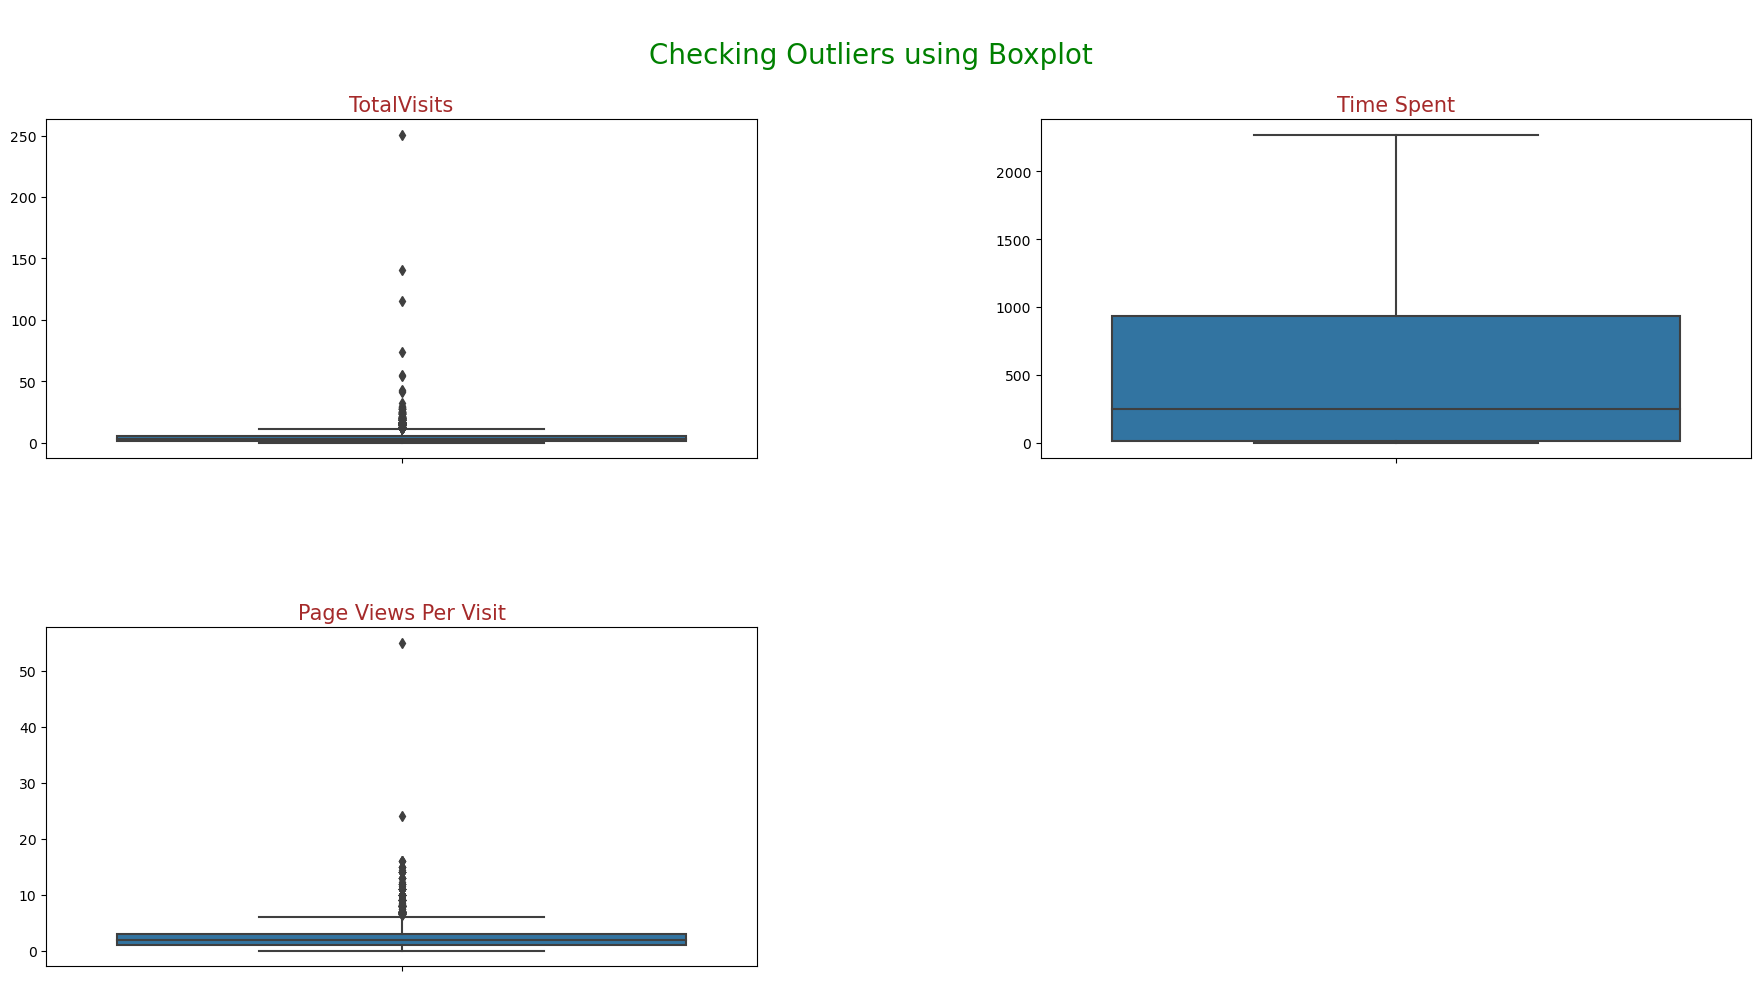

In [40]:
# Checking outliers for numerical variables other than target variable 
num_cols = df_leads.select_dtypes(include=['int64', 'float64']).columns.tolist()

# UDF 
Check_Outliers(df_leads,num_cols)

`"TotalVisits"`,`"Page Views Per Visit"`:Both these variables contain outliers as can be seen in the boxplot
So, These outliers needs to be treated for these variables

In [41]:
# Before outlier treatment

df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,TotalVisits,Time Spent,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
95%,10.000000,1562.000000,6.000000
max,251.000000,2272.000000,55.000000


In [42]:
# Defining UDF to treat outliers via capping and flooring

def Outlier_treatment(df,columnList):
    for i in columnList:
        q1 = df[i].describe()["25%"]
        q3 = df[i].describe()["75%"]
        IQR = q3 - q1

        upper_bound = q3 + 1.5*IQR
        lower_bound = q1 - 1.5*IQR

        # capping upper_bound
        df[i] = np.where(df[i] > upper_bound, upper_bound,df[i])

        # flooring lower_bound
        df[i] = np.where(df[i] < lower_bound, lower_bound,df[i])

In [43]:
# Checking outliers for numerical variables other than target variable 

capping_cols = ["TotalVisits","Page Views Per Visit","Time Spent"]

# UDF 
Outlier_treatment(df_leads,capping_cols)

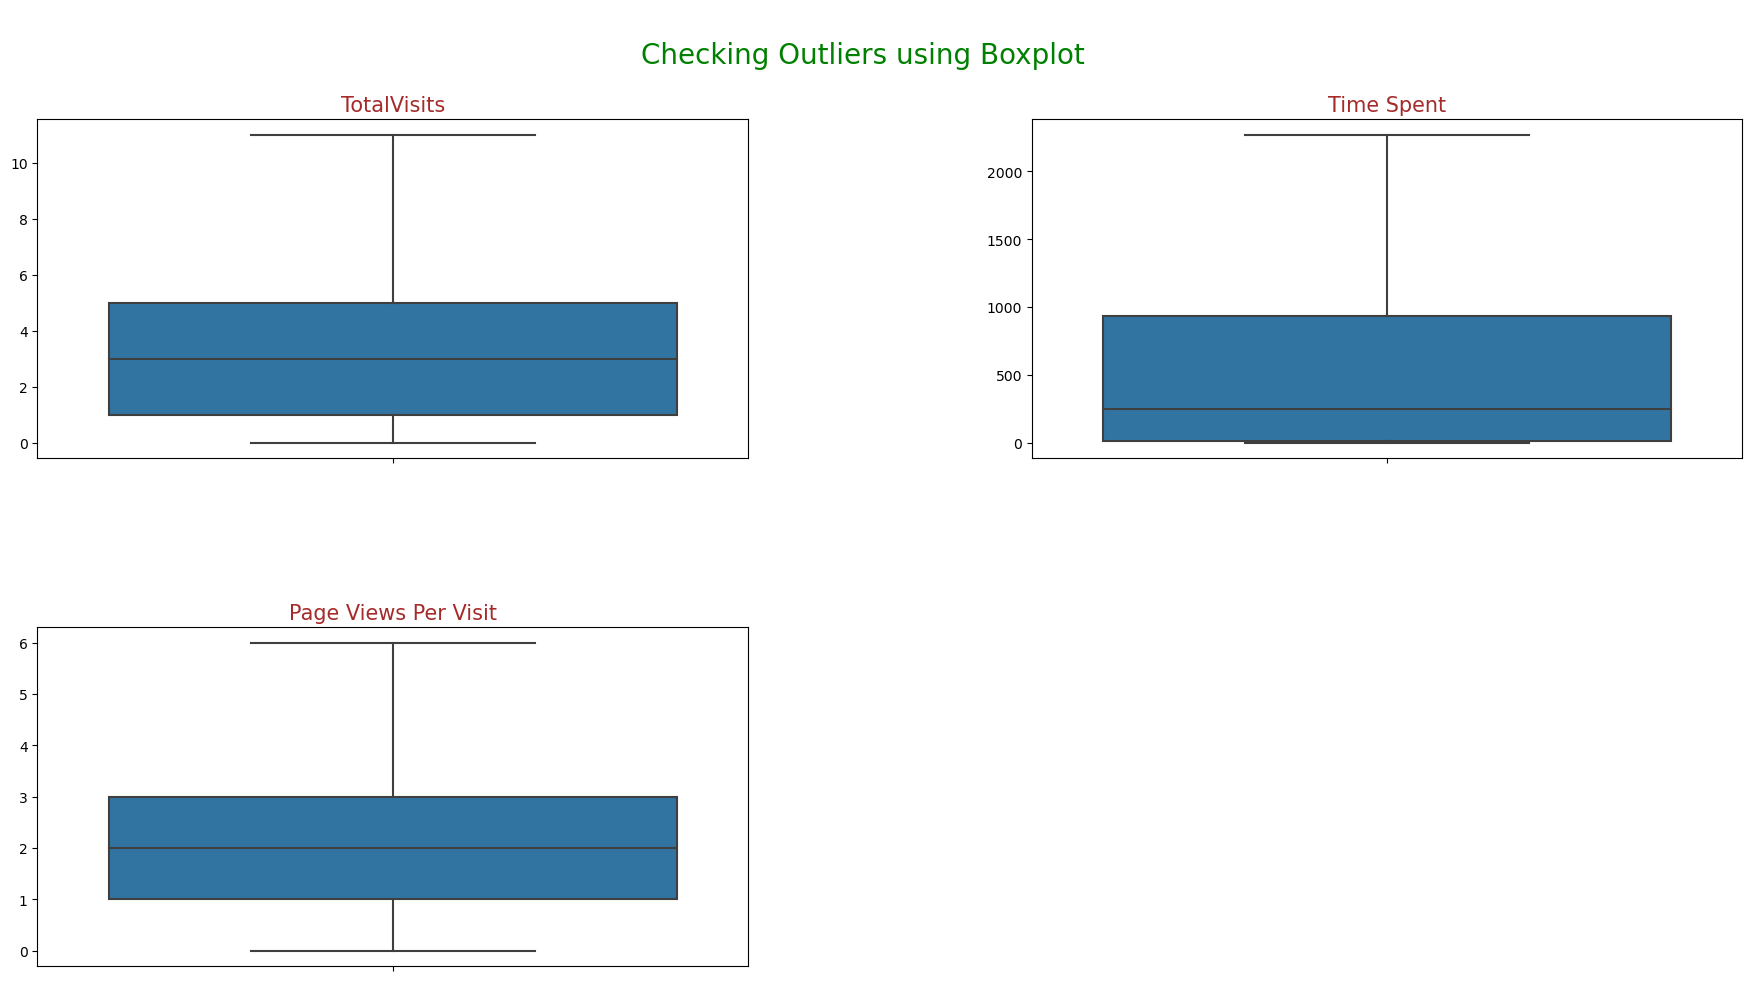

In [44]:
# Checking Boxplot after Outlier Treatment

num_cols = df_leads.select_dtypes(include=['int64', 'float64']).columns.tolist()

# UDF for boxplot
Check_Outliers(df_leads,num_cols)

In [45]:
# Detailed percentile values after outlier treatment

df_leads.describe(percentiles=[.10,.25,.50,.75,.95])

,TotalVisits,Time Spent,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.217424,487.698268,2.255105
std,2.860471,548.021466,1.779471
min,0.000000,0.000000,0.000000
10%,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
95%,10.000000,1562.000000,6.000000
max,11.000000,2272.000000,6.000000


#### All the missing values, outliers & levels are handled.

# **<font color=brown>3. Exploratory Data Analysis (EDA) </font>** 

## 3.1 Checking Data Imbalance

- Data is imbalance when one value is present in majority and other is in minority meaning an uneven distribution of observations in dataset.
- Data imbalance is in the context of Target variable only
- `Target variable` is `'Converted'` which tells whether a past lead was converted or not.

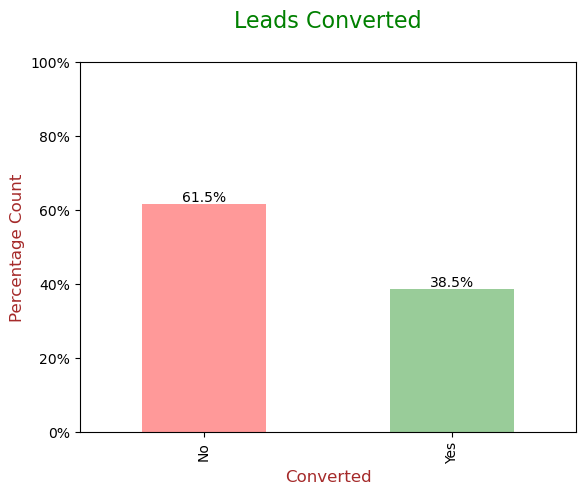

In [46]:
## Ploting the results on bar plot

ax=(100*df_leads["Converted"].value_counts(normalize=True)).plot.bar(color=["Red","Green"],alpha=0.4)

# Adding and formatting title
plt.title("Leads Converted\n", fontdict={'fontsize': 16, 'fontweight' : 12, 'color' : 'Green'})


# Labeling Axes
plt.xlabel('Converted', fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})
plt.ylabel("Percentage Count", fontdict={'fontsize': 12, 'fontweight' : 20, 'color' : 'Brown'})

# modification ticks y axis
ticks=np.arange(0,101,20)
labels=["{:.0f}%".format(i) for i in ticks] 
plt.yticks(ticks,labels)

for p in ax.patches:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
plt.show()

**<font color=purple> Insights: </font>**
- **Conversion rate is of 38.5%**, meaning only 38.5% (Minority) of the people have converted to leads.
- While 61.5% (Majority) of the people didnt convert to leads.

In [47]:
### Ratio of Data Imbalance

ratio=(df_leads["Converted"].value_counts(normalize=True).loc["No"])/(df_leads["Converted"].value_counts(normalize=True).loc["Yes"])

print("Data Imbalance Ratio : {:.2f} : {}".format(ratio,1))

Data Imbalance Ratio : 1.59 : 1


## 3.2 Univariate Analysis

In [48]:
df_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Free Copy
0,API,Olark Chat,No,0.0,0.0,0.0,Page Visited on Website,Not Specified,Unemployed,No
1,API,Organic Search,No,5.0,674.0,2.5,Email Opened,Not Specified,Unemployed,No
2,Landing Page Submission,Direct Traffic,Yes,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,Yes,2.0,1428.0,1.0,Converted to Lead,Not Specified,Unemployed,No


### 3.2.1 Categorical Variables

In [49]:
#List of categorical columns

cat_cols = df_leads.select_dtypes(include=['category', 'object']).columns.tolist()

# Print the selected columns
print(cat_cols)

['Lead Origin', 'Lead Source', 'Converted', 'Last Activity', 'Specialization', 'Current Occupation', 'Free Copy']


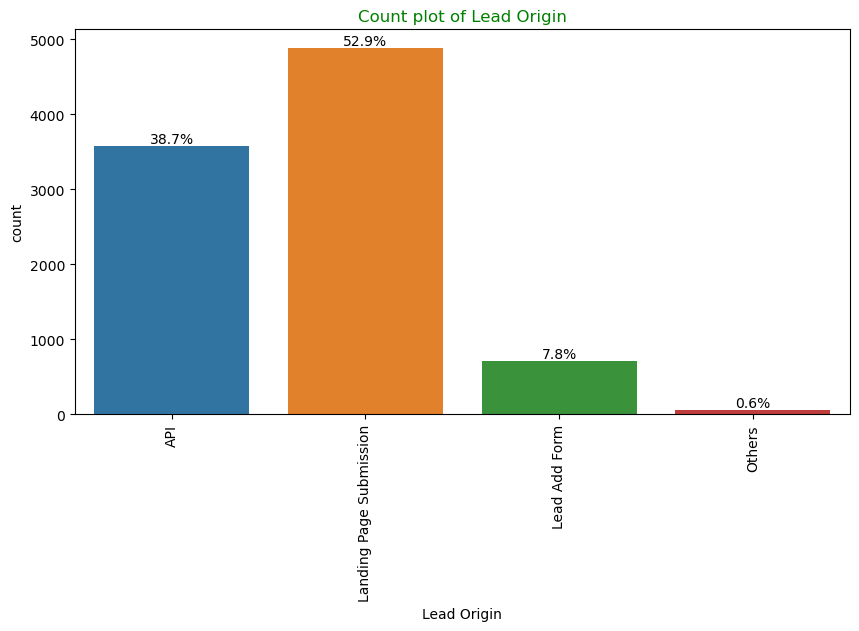

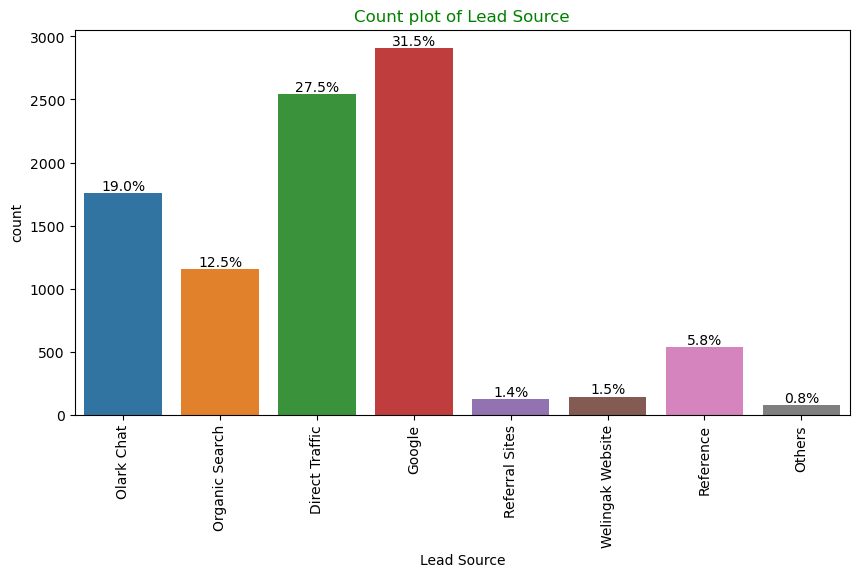

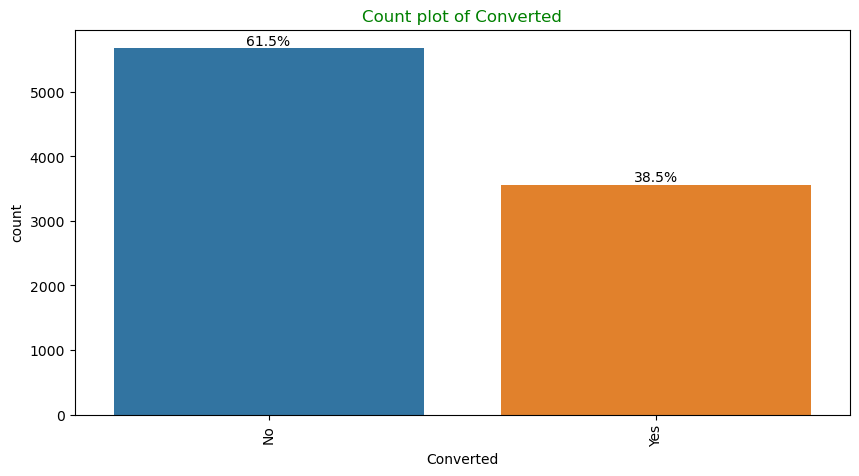

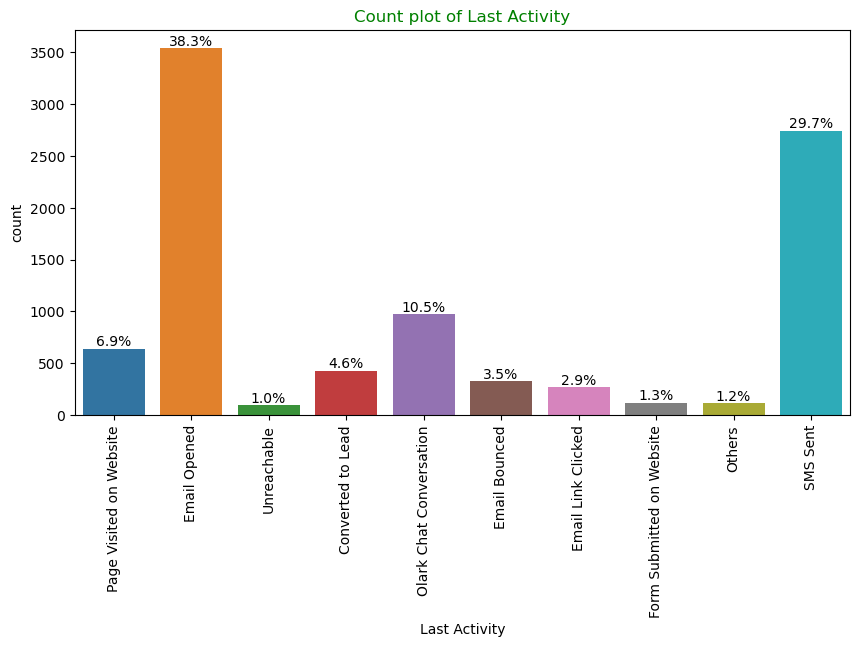

In [50]:
# Countplot of columns with its value_counts percentage as annotation

for i in cat_cols[:4]:
    
    plt.figure(figsize=[10,5])
    plt.title("Count plot of {}".format(i),color="green")
    ax=sns.countplot(x=i,data=df_leads)
    total=len(df_leads[i])
    plt.xticks(rotation=90)
    
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()
        
        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')


**<font color=purple>Insights Univariate:</font>**  

**Here is the list of features from variables which are present in majority (Converted and Not Converted included)** 

- **Lead Origin:** "Landing Page Submission" identified 53% customers, "API" identified 39%. 

- **Current_occupation:** It has 90% of the customers as Unemployed

- **Do Not Email:** 92% of the people has opted that they dont want to be emailed about the course.

- **Lead Source:** 58% Lead source is from Google & Direct Traffic combined

- **Last Activity:** 68% of customers contribution in SMS Sent & Email Opened activities

**<font color=blue>NOTE:</font>** These insights will be helpful in further Bivariate Analysis.

### 3.2.2 Numerical Variables

In [51]:
#List of numerical columns

num_cols = df_leads.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print the selected columns
print(num_cols)

['TotalVisits', 'Time Spent', 'Page Views Per Visit']


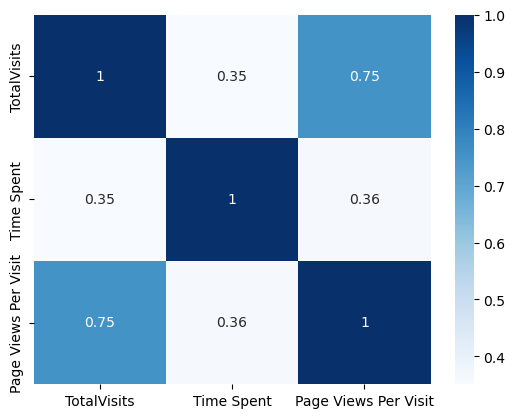

In [52]:
# Heatmap to show correlation between numerical variables

sns.heatmap(data=df_leads[num_cols].corr(),cmap="Blues",annot=True)
plt.show()

## 3.3 Bivariate Analysis

In [53]:
df_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Free Copy
0,API,Olark Chat,No,0.0,0.0,0.0,Page Visited on Website,Not Specified,Unemployed,No
1,API,Organic Search,No,5.0,674.0,2.5,Email Opened,Not Specified,Unemployed,No
2,Landing Page Submission,Direct Traffic,Yes,2.0,1532.0,2.0,Email Opened,Business Administration,Student,Yes
3,Landing Page Submission,Direct Traffic,No,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,No
4,Landing Page Submission,Google,Yes,2.0,1428.0,1.0,Converted to Lead,Not Specified,Unemployed,No


### 3.3.1 Categorical Variables

In [54]:
# UDF "Bivariate_cat" tells comparision between Actual Distribution (value_count percentage) from the data and 
# 2nd graph tell the Lead Conversion Rate in percentage (how much leads are converted from 1st plot distribution)

def Bivariate_cat(df,variable_name,Target="Converted"):
    plt.figure(figsize=(20,6))
    plt.suptitle("{} Countplot vs Lead Conversion Rates".format(variable_name),color="Brown", fontsize=18)
    
    # 1st plot in subplot
    plt.subplot(1,2,1)
    plt.title("Distribution of {}".format(variable_name),color="blue")
    ax=sns.countplot(x=variable_name,hue=Target,data=df_leads,palette="prism_r",alpha=0.46)
    
    total=len(df_leads[variable_name])
    plt.xticks(rotation=90)
    plt.legend(["No","Yes"],title = "Converted")
    
    # Annotation for 1st plot        
    for p in ax.patches:
        text = '{:.1f}%'.format(100*p.get_height()/total)
        x = p.get_x() + p.get_width() / 2.
        y = p.get_height()

        ax.annotate(text, (x,y), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    # 2nd plot
    plt.subplot(1,2,2)
    plt.title("Lead Conversion Rate of {}".format(variable_name),color="green",fontsize=12)
    ax=sns.countplot(x=variable_name,hue=Target,data=df,palette="BuGn",alpha=0.85)   #ax1 is for annotation
    
    # Modifications
    plt.xticks(rotation=90)
    plt.ylabel("Count",color='brown')
    plt.xlabel("{}".format(variable_name))
    plt.legend(labels=["Not Converted","Converted"],title = "Lead Conversion Rate")
    
    # Annotation for 2nd plot
    # Calculate percentage above bars in countplot (Conversion rate)
    all_heights = [[p.get_height() for p in bars] for bars in ax.containers]
    for bars in ax.containers:
        for i, p in enumerate(bars):
            total = sum(xgroup[i] for xgroup in all_heights)
            percentage = f'{(100 * p.get_height() / total) :.1f}%'
            ax.annotate(percentage, (p.get_x() + p.get_width() / 2, p.get_height()), size=11, ha='center', va='bottom')


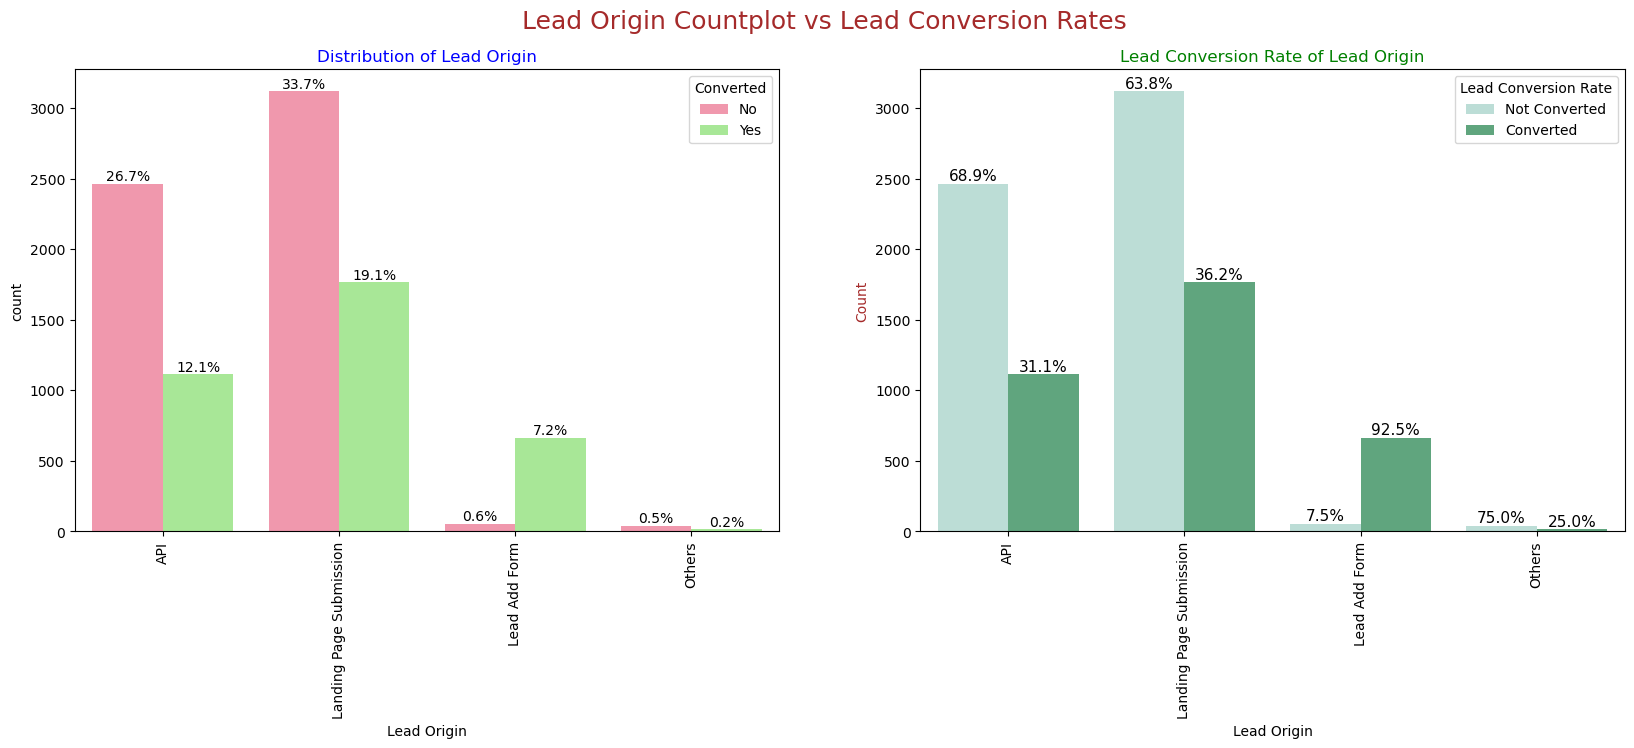

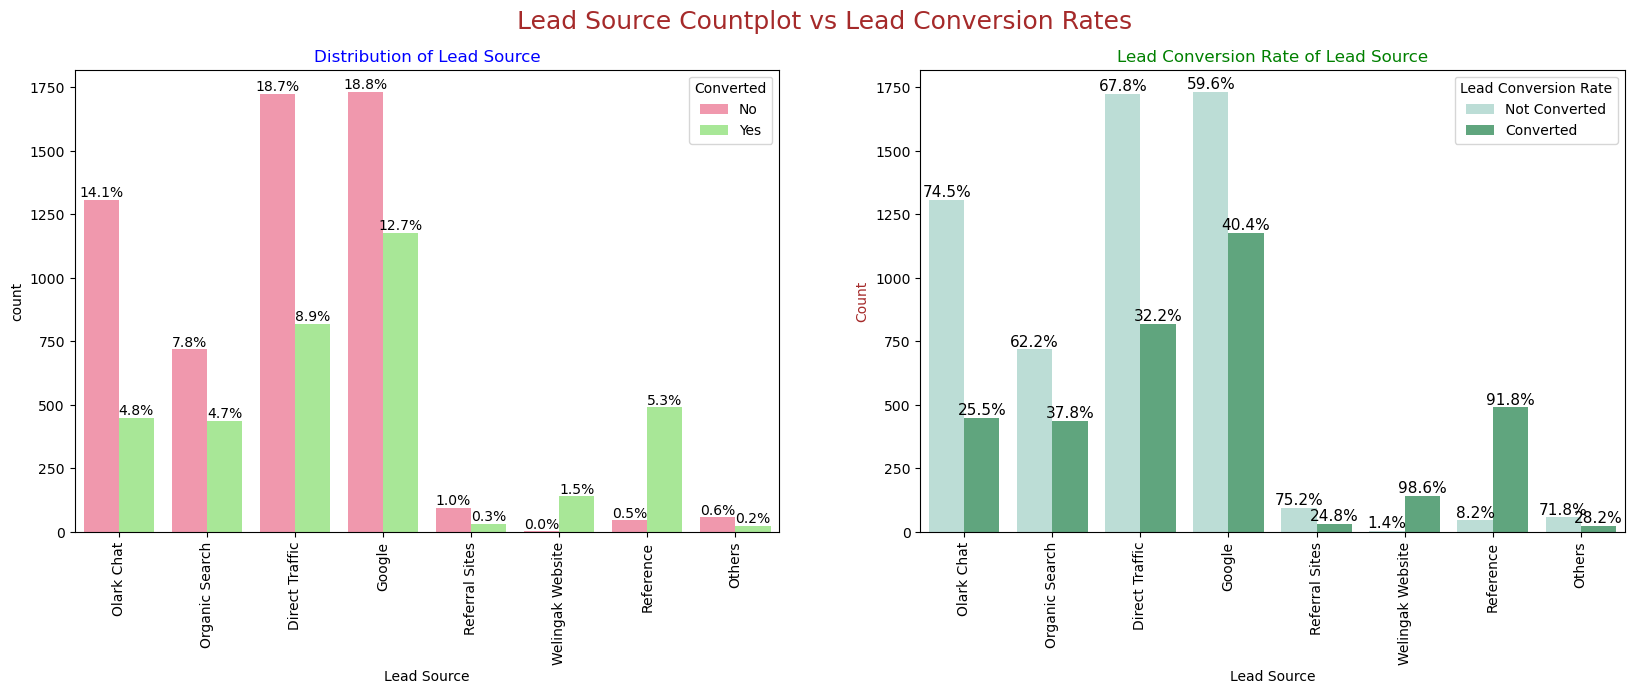

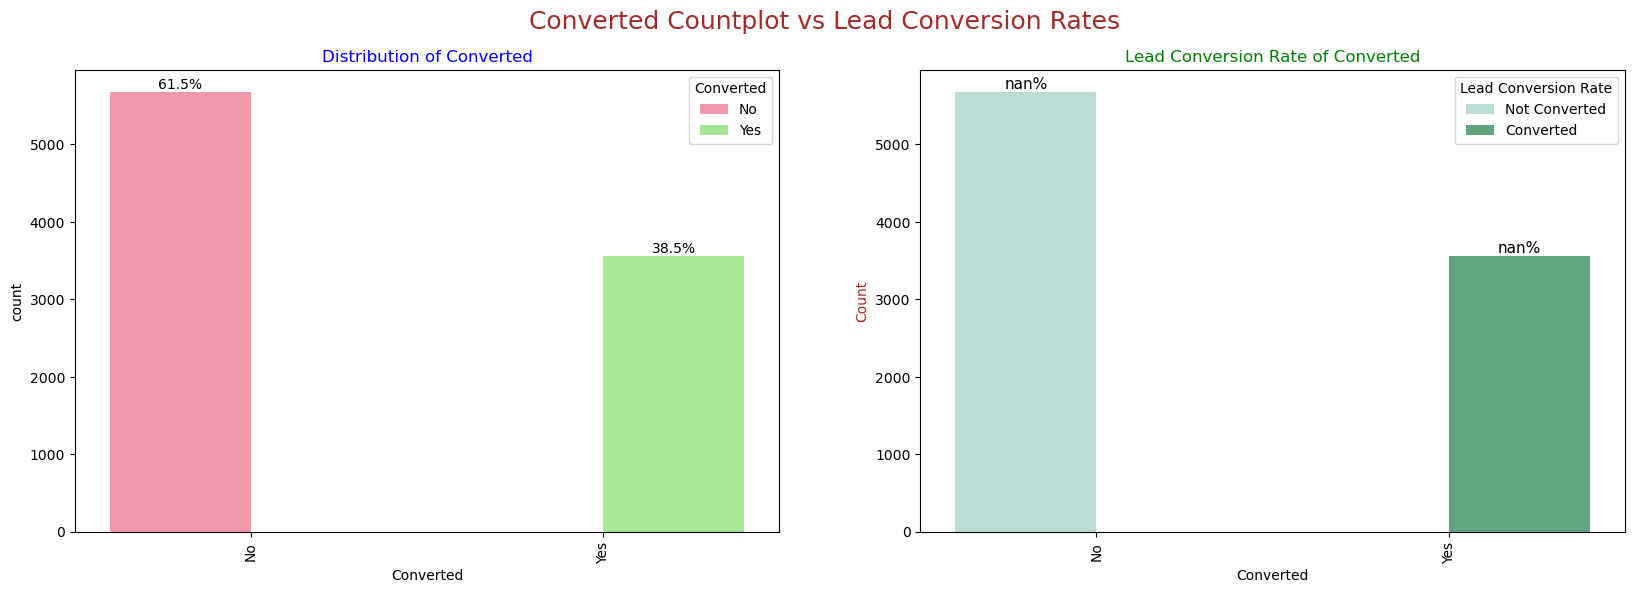

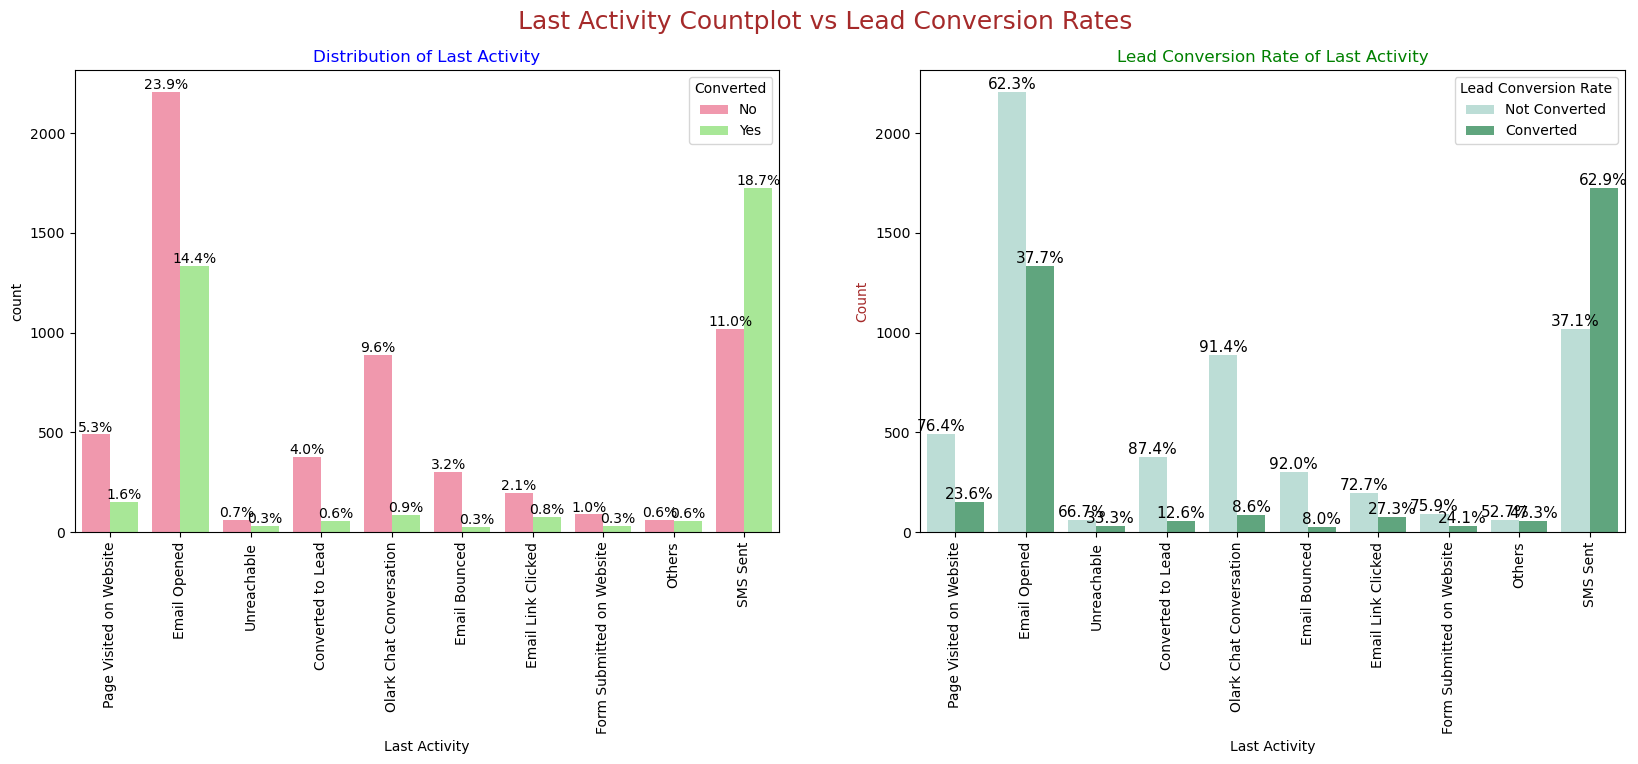

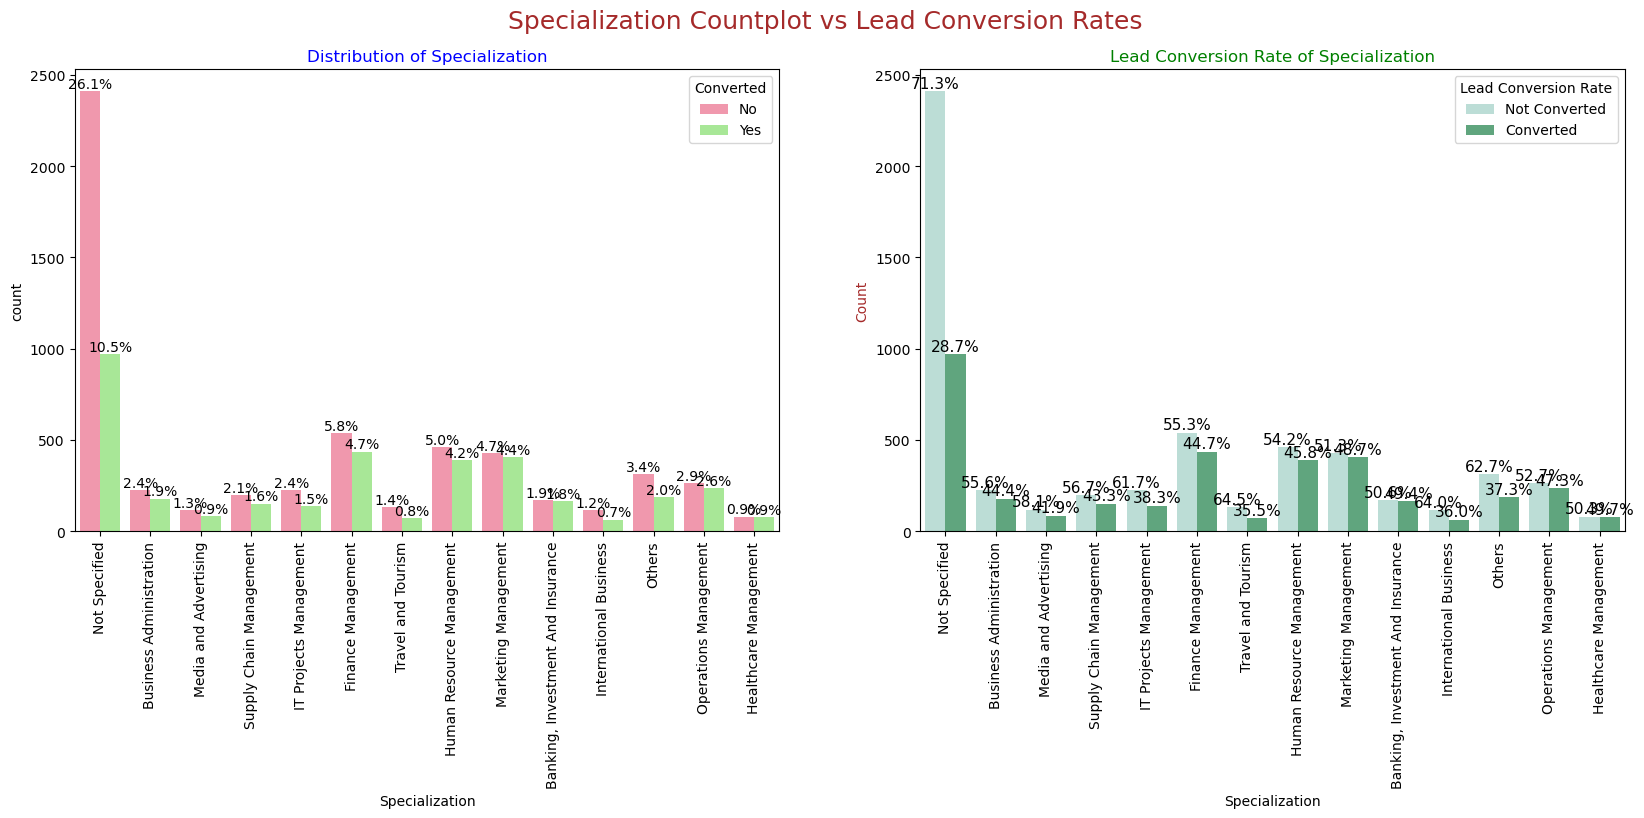

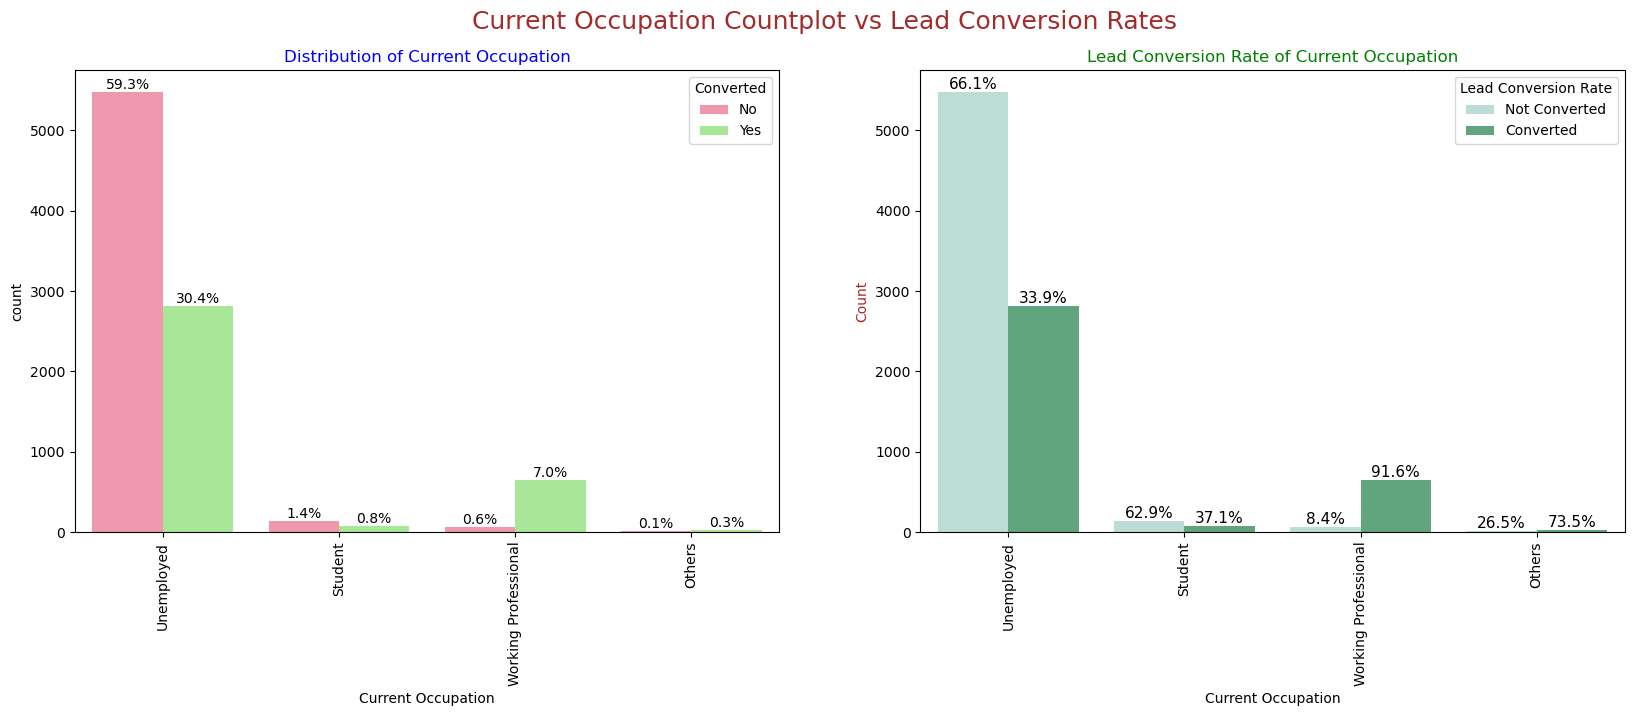

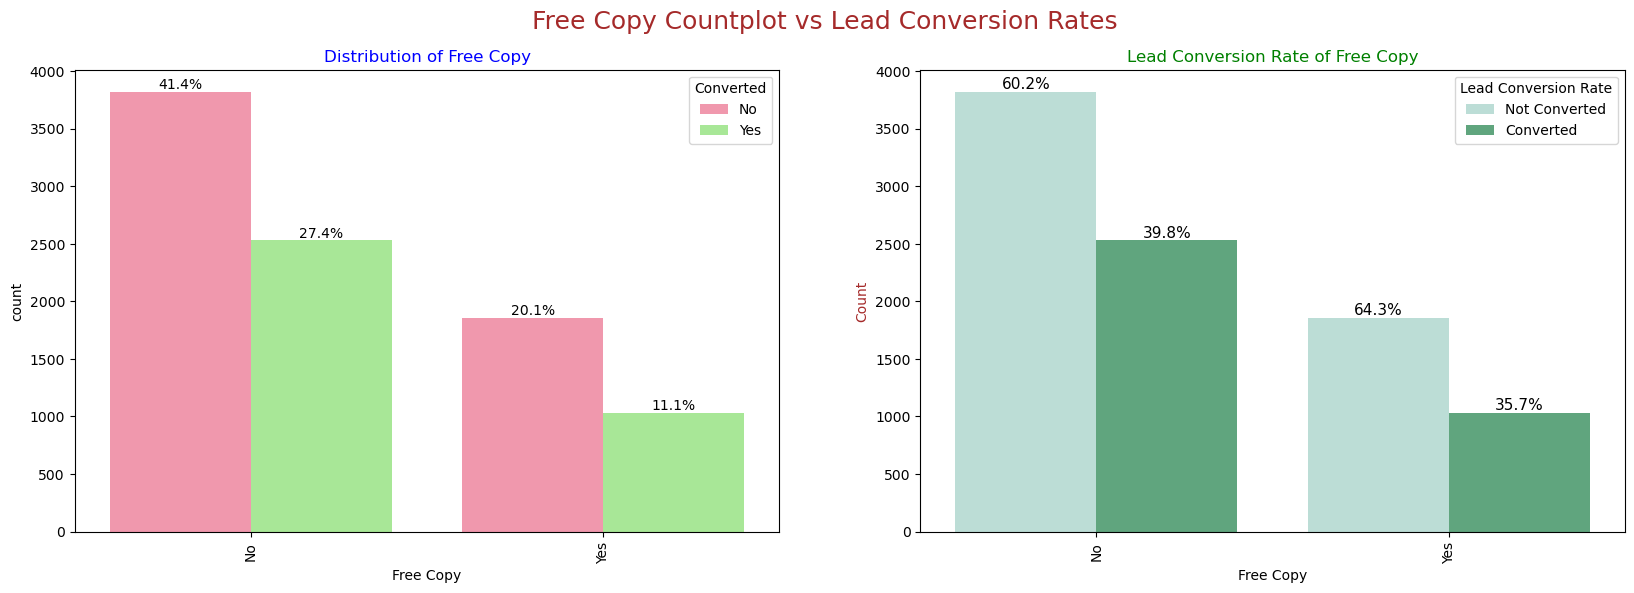

In [55]:
# Bivariate Analysis for all these variables using loop and UDF
# Comparision between variables w.r.t. 'Converted' (Target variable) , taking one categorical column w.r.t target variable as 'hue'

for i in cat_cols:
    Bivariate_cat(df_leads,variable_name=i)

**<font color=purple>Insights:</font>**  

- **<font color=Green>Lead Origin:</font>** Around 52% of all leads originated from _"Landing Page Submission"_ with a **lead conversion rate (LCR) of 36%**.The _"API"_ identified approximately 39% of customers with a **lead conversion rate (LCR) of 31%**.

- **<font color=Green>Lead Source:</font>** _Google_ has **lead conversion rate (LCR) of 40%** out of 31% customers , _Direct Traffic_ contributes **32% lead conversion rate (LCR)** with 27% customers which is lower than Google,_Organic Search_ also gives **37.8% of lead conversion rate (LCR)** but the contribution is by only 12.5% of customers ,_Reference_ has **lead conversion rate (LCR) of 91%** but there are only around 6% of customers through this Lead Source.

- **<font color=Green>Last Activity:</font>** _'SMS Sent'_ has **high lead conversion rate of 63%** with 30% contribution from last activities, _'Email Opened'_ activity contributed 38% of last activities performed by the customers with 37% **lead conversion rate**.

- **<font color=Green>Specialization:</font>** Marketing Managemt,HR Management,Finance Management shows good contribution.

- **<font color=Green>Current_occupation:</font>** Around 90% of the customers are _Unemployed_ with **lead conversion rate (LCR) of 34%**. While _Working Professional_ contribute only 7% of total customers with almost **92% lead conversion rate (LCR)**.

### 3.3.2 Numerical Variables

<Figure size 1600x400 with 0 Axes>

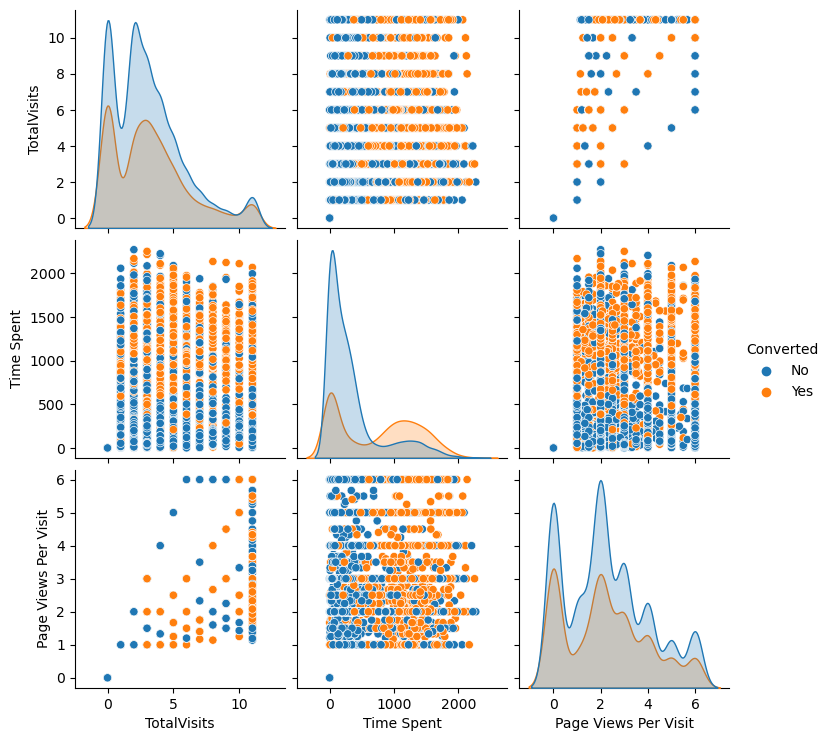

In [56]:
plt.figure(figsize=(16, 4))
sns.pairplot(data=df_leads,vars=num_cols,hue="Converted")                                  
plt.show()

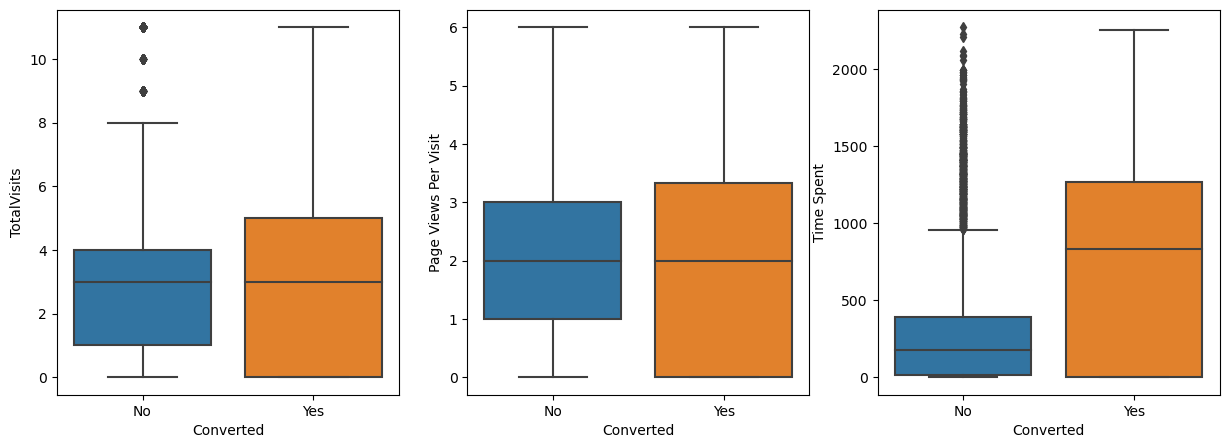

In [57]:
# Boxplot with Converted as hue

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = df_leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df_leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'Time Spent', x = 'Converted', data = df_leads)
plt.show()

**<font color=purple>Insights:</font>**  
- Past Leads who spends more time on Website are successfully converted than those who spends less as seen in the boxplot

# **<font color=brown>4. Data Preparation </font>** 

### 4.1 Binary Conversion

In [58]:
varlist =['Free Copy','Converted']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

df_leads[varlist] = df_leads[varlist].apply(binary_map)

### 4.2 Dummy Variables
- For categorical variables with multiple levels, create dummy features

In [59]:
df_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Free Copy
0,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,Not Specified,Unemployed,0
1,API,Organic Search,0,5.0,674.0,2.5,Email Opened,Not Specified,Unemployed,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1
3,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,0
4,Landing Page Submission,Google,1,2.0,1428.0,1.0,Converted to Lead,Not Specified,Unemployed,0


In [60]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.

dummy = pd.get_dummies(df_leads[["Lead Origin","Lead Source","Last Activity","Specialization","Current Occupation"]], drop_first=True)

# Adding the results to the master dataframe
df_leads = pd.concat([df_leads, dummy], axis=1)

In [61]:
df_leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Time Spent,Page Views Per Visit,Last Activity,Specialization,Current Occupation,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
0,API,Olark Chat,0,0.0,0.0,0.0,Page Visited on Website,Not Specified,Unemployed,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,API,Organic Search,0,5.0,674.0,2.5,Email Opened,Not Specified,Unemployed,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,Landing Page Submission,Direct Traffic,1,2.0,1532.0,2.0,Email Opened,Business Administration,Student,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Landing Page Submission,Direct Traffic,0,1.0,305.0,1.0,Unreachable,Media and Advertising,Unemployed,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,Landing Page Submission,Google,1,2.0,1428.0,1.0,Converted to Lead,Not Specified,Unemployed,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [62]:
# We have created dummies for the below variables, so we can drop them

df_leads = df_leads.drop(["Lead Origin","Lead Source","Last Activity","Specialization","Current Occupation"],1)

In [63]:
df_leads.shape

(9240, 40)

In [64]:
df_leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Converted                                 9240 non-null   int64  
 1   TotalVisits                               9240 non-null   float64
 2   Time Spent                                9240 non-null   float64
 3   Page Views Per Visit                      9240 non-null   float64
 4   Free Copy                                 9240 non-null   int64  
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Others                        9240 non-null   uint8  
 8   Lead Source_Google                        9240 non-null   uint8  
 9   Lead Source_Olark Chat                    9240 non-null   uint8  
 10  Lead Source_Organic Search          

**<font color=purple>Insights:</font>**  
- All columns are already converted into Integer/Numerical datatype.
- Hence, we can continue with our evaluation.

# **<font color=brown>5. Train-Test Split </font>** 

In [65]:
# Putting predictor variables to X
X = df_leads.drop('Converted', axis=1)

# Putting Target variables to y
y = df_leads["Converted"]

In [66]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [67]:
print("X_train:", X_train.shape,"\ny_train:",y_train.shape)

X_train: (6468, 39) 
y_train: (6468,)


In [68]:
print("X_test:", X_test.shape,"\ny_test:",y_test.shape)

X_test: (2772, 39) 
y_test: (2772,)


# **<font color=brown>6. Feature Scaling </font>** 

In [69]:
# Using standard scaler for scaling the features
scaler = StandardScaler()

# Fetching numerical columns from dataframe for scaling
num_cols=X_train.select_dtypes(include=['int64','float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [70]:
# X-train dataframe after standard scaling
X_train.head()

,TotalVisits,Time Spent,Page Views Per Visit,Free Copy,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Others,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Specialization_Business Administration,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Others,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Current Occupation_Student,Current Occupation_Unemployed,Current Occupation_Working Professional
1871,-1.122305,-0.885371,-1.266675,-0.673169,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
6795,0.275215,0.005716,-0.516439,1.485511,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3516,0.624595,-0.691418,0.143543,-0.673169,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
8105,0.624595,1.365219,1.553761,-0.673169,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3934,-1.122305,-0.885371,-1.266675,-0.673169,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


In [71]:
# Checking the Lead Conversion Rate (LCR)
# We will denote Lead Conversion Rate with 'LCR' as its short form

LCR = (sum(df_leads['Converted'])/len(df_leads['Converted'].index))*100
LCR

38.53896103896104

**<font color=blue>NOTE: </font>**We have 38.5% Conversion Rate

### 6.1 Correlation

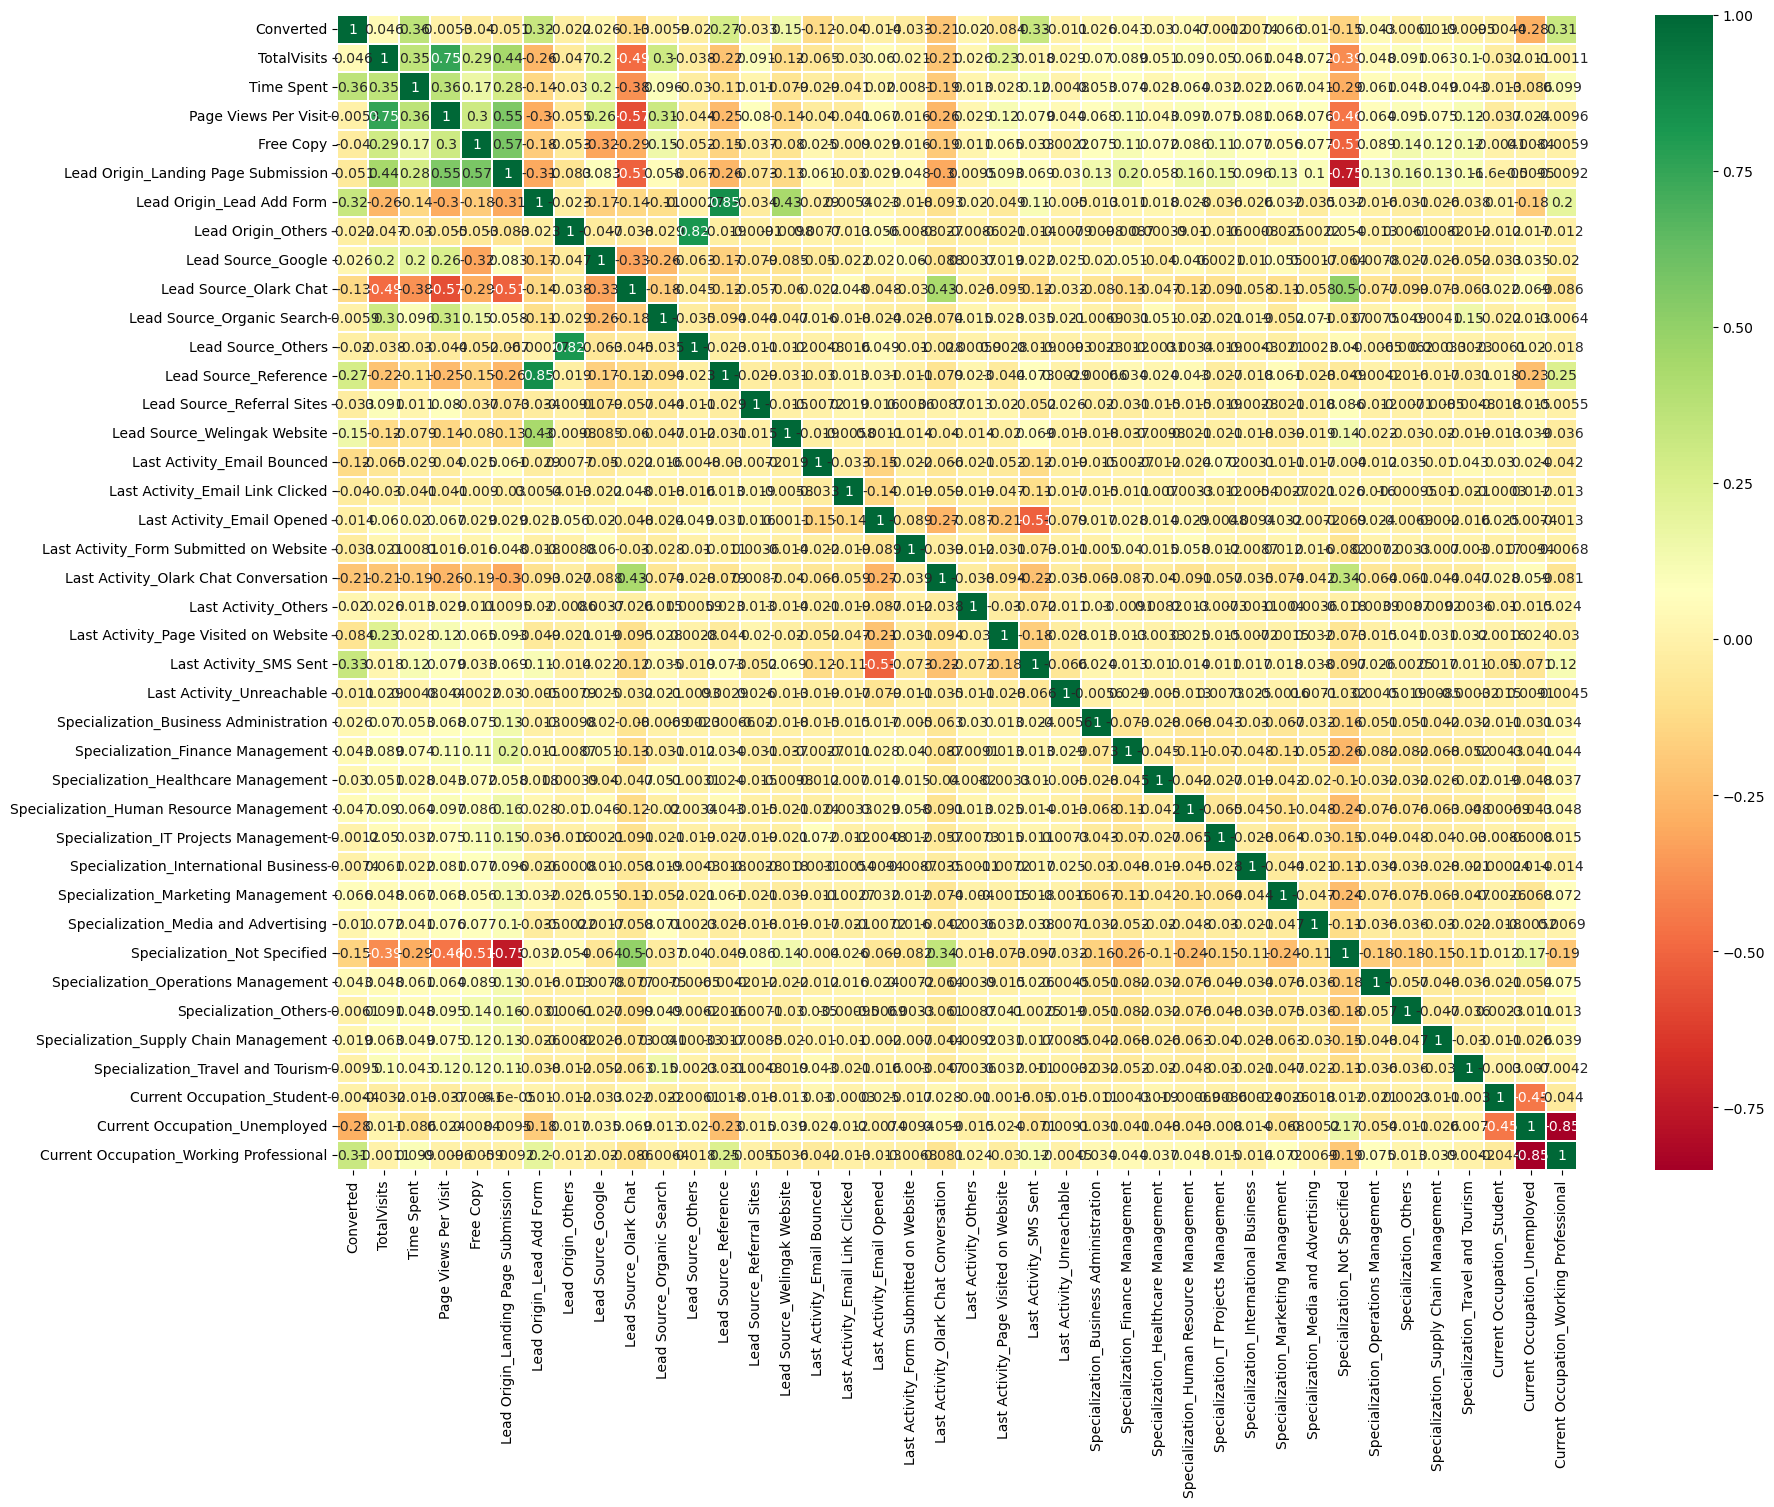

In [72]:
# Analyse correlation matrix

plt.figure(figsize = (20,15))        
sns.heatmap(df_leads.corr(),linewidths=0.01,cmap="RdYlGn",annot=True)
plt.show()

Drop `'Lead Source_Reference'` and `'Lead Origin_Lead Add Form'` as they are highly correlated.

In [73]:
X_test = X_test.drop(['Lead Origin_Others','Lead Origin_Lead Add Form'],1)

X_train = X_train.drop(['Lead Origin_Others','Lead Origin_Lead Add Form'],1)

# **<font color=brown>7. Model Building </font>** 

- We will Build Logistic Regression Model for predicting categorical variable
- Feature Selection Using RFE (Coarse tuning)
- Manual fine-tuning using p-values and VIFs

### 7.1 Feature Selection Using RFE (Recursive Feature Elimination)

In [74]:
# Lets use RFE to reduce variables 

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=20)            
rfe = rfe.fit(X_train, y_train)

In [75]:
#Checking the output of RFE

top20=pd.DataFrame()
top20['features']=X_train.columns
top20['Feature Chosen'] = rfe.support_
top20['Ranking']=rfe.ranking_
top20.sort_values(by='Ranking')

,features,Feature Chosen,Ranking
0,TotalVisits,True,1
34,Current Occupation_Student,True,1
29,Specialization_Not Specified,True,1
26,Specialization_International Business,True,1
20,Last Activity_Unreachable,True,1
19,Last Activity_SMS Sent,True,1
35,Current Occupation_Unemployed,True,1
17,Last Activity_Others,True,1
16,Last Activity_Olark Chat Conversation,True,1
14,Last Activity_Email Opened,True,1


In [76]:
# Columns which are selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['TotalVisits', 'Time Spent', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Last Activity_Unreachable',
       'Specialization_International Business', 'Specialization_Not Specified',
       'Current Occupation_Student', 'Current Occupation_Unemployed',
       'Current Occupation_Working Professional'],
      dtype='object')

In [77]:
# Columns which are not selected by RFE

X_train.columns[~rfe.support_]

Index(['Free Copy', 'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referral Sites', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration',
       'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management', 'Specialization_Others',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism'],
      dtype='object')

In [78]:
# User defined function for calculating VIFs for variables

def get_vif(model_df):
    X = pd.DataFrame()
    X['Features'] = model_df.columns
    X['VIF'] = [variance_inflation_factor(model_df.values, i) for i in range(model_df.shape[1])]
    X['VIF'] = round(X['VIF'], 2)
    X = X.sort_values(by='VIF', ascending=False)
    X = X.reset_index(drop=True)
    return X

### Model-1

In [79]:
# Building model using statsmodels, for the detailed statistics

# columns selected by RFE to be used for this model 
rfe_col=X_train.columns[rfe.support_]

# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm1 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm1 = sm.GLM(y_train,X_train_sm1,family = sm.families.Binomial()).fit()  

logm1.params

const                                     -0.216003
TotalVisits                                0.359086
Time Spent                                 1.042938
Page Views Per Visit                      -0.369646
Lead Origin_Landing Page Submission       -1.080433
Lead Source_Google                         0.309557
Lead Source_Olark Chat                     1.040550
Lead Source_Reference                      3.032861
Lead Source_Welingak Website               5.548343
Last Activity_Email Bounced               -0.833980
Last Activity_Email Link Clicked           0.433956
Last Activity_Email Opened                 0.976288
Last Activity_Olark Chat Conversation     -0.561633
Last Activity_Others                       1.502863
Last Activity_SMS Sent                     2.141720
Last Activity_Unreachable                  0.999740
Specialization_International Business     -0.361101
Specialization_Not Specified              -1.158854
Current Occupation_Student                -0.677263
Current Occu

In [80]:
#Summary of our logistic regression model

print(logm1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.4
Date:                Thu, 12 Oct 2023   Deviance:                       5398.9
Time:                        21:33:47   Pearson chi2:                 8.07e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3902
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [81]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Current Occupation_Unemployed,18.69
1,Lead Origin_Landing Page Submission,7.46
2,Specialization_Not Specified,4.72
3,Last Activity_Email Opened,4.02
4,Last Activity_SMS Sent,3.47
5,Lead Source_Olark Chat,3.37
6,Page Views Per Visit,3.07
7,TotalVisits,2.40
8,Current Occupation_Working Professional,2.40
9,Last Activity_Olark Chat Conversation,2.18


**<font color=blue>NOTE: </font>**Drop 'Current Occupation_Student' as it has high P-Value

In [82]:
# Dropping 'Current Occupation_Student' column

rfe_col=rfe_col.drop("Current Occupation_Student")

### Model-2

In [83]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm2 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm2 = sm.GLM(y_train,X_train_sm2,family = sm.families.Binomial()).fit()  

logm2.params

const                                     -0.774022
TotalVisits                                0.359840
Time Spent                                 1.043826
Page Views Per Visit                      -0.369544
Lead Origin_Landing Page Submission       -1.085117
Lead Source_Google                         0.307837
Lead Source_Olark Chat                     1.037856
Lead Source_Reference                      3.035134
Lead Source_Welingak Website               5.550014
Last Activity_Email Bounced               -0.840799
Last Activity_Email Link Clicked           0.431415
Last Activity_Email Opened                 0.971703
Last Activity_Olark Chat Conversation     -0.562077
Last Activity_Others                       1.497851
Last Activity_SMS Sent                     2.136760
Last Activity_Unreachable                  1.007047
Specialization_International Business     -0.365660
Specialization_Not Specified              -1.163955
Current Occupation_Unemployed             -0.553460
Current Occu

In [84]:
#Summary of our logistic regression model
print(logm2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.1
Date:                Thu, 12 Oct 2023   Deviance:                       5400.2
Time:                        21:33:47   Pearson chi2:                 8.09e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3901
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [85]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Current Occupation_Unemployed,13.27
1,Lead Origin_Landing Page Submission,6.06
2,Specialization_Not Specified,4.16
3,Last Activity_Email Opened,3.69
4,Last Activity_SMS Sent,3.28
5,Lead Source_Olark Chat,3.27
6,Page Views Per Visit,3.06
7,TotalVisits,2.38
8,Last Activity_Olark Chat Conversation,2.10
9,Current Occupation_Working Professional,2.01


**<font color=blue>NOTE: </font>**Drop 'Specialization_International Business' as it has high P-Value

In [86]:
# Dropping 'Specialization_International Business' column

rfe_col=rfe_col.drop("Specialization_International Business")

### Model-3

In [87]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm3 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm3 = sm.GLM(y_train,X_train_sm3,family = sm.families.Binomial()).fit()  

logm3.params

const                                     -0.785063
TotalVisits                                0.360720
Time Spent                                 1.044953
Page Views Per Visit                      -0.372353
Lead Origin_Landing Page Submission       -1.084159
Lead Source_Google                         0.306157
Lead Source_Olark Chat                     1.035490
Lead Source_Reference                      3.033837
Lead Source_Welingak Website               5.549055
Last Activity_Email Bounced               -0.853305
Last Activity_Email Link Clicked           0.431161
Last Activity_Email Opened                 0.971105
Last Activity_Olark Chat Conversation     -0.561159
Last Activity_Others                       1.499290
Last Activity_SMS Sent                     2.135751
Last Activity_Unreachable                  0.983251
Specialization_Not Specified              -1.152629
Current Occupation_Unemployed             -0.552297
Current Occupation_Working Professional    2.155511
dtype: float

In [88]:
#Summary of our logistic regression model
print(logm3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.2
Date:                Thu, 12 Oct 2023   Deviance:                       5402.5
Time:                        21:33:47   Pearson chi2:                 8.08e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3899
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [89]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Current Occupation_Unemployed,13.26
1,Lead Origin_Landing Page Submission,6.06
2,Specialization_Not Specified,4.15
3,Last Activity_Email Opened,3.69
4,Last Activity_SMS Sent,3.28
5,Lead Source_Olark Chat,3.27
6,Page Views Per Visit,3.06
7,TotalVisits,2.38
8,Last Activity_Olark Chat Conversation,2.10
9,Current Occupation_Working Professional,2.01


**<font color=blue>NOTE: </font>**Drop 'Last Activity_Email Link Clicked' as it has high P-Value

In [90]:
# Dropping 'Last Activity_Email Link Clicked' column

rfe_col=rfe_col.drop("Last Activity_Email Link Clicked")

### Model-4

In [91]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm4 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm4 = sm.GLM(y_train,X_train_sm4,family = sm.families.Binomial()).fit()  

logm4.params

const                                     -0.711682
TotalVisits                                0.354449
Time Spent                                 1.042933
Page Views Per Visit                      -0.365850
Lead Origin_Landing Page Submission       -1.082633
Lead Source_Google                         0.306696
Lead Source_Olark Chat                     1.049594
Lead Source_Reference                      3.052773
Lead Source_Welingak Website               5.584955
Last Activity_Email Bounced               -0.935871
Last Activity_Email Opened                 0.888046
Last Activity_Olark Chat Conversation     -0.650056
Last Activity_Others                       1.416719
Last Activity_SMS Sent                     2.051952
Last Activity_Unreachable                  0.902268
Specialization_Not Specified              -1.148682
Current Occupation_Unemployed             -0.547738
Current Occupation_Working Professional    2.157344
dtype: float64

In [92]:
#Summary of our logistic regression model

print(logm4.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6450
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2702.7
Date:                Thu, 12 Oct 2023   Deviance:                       5405.5
Time:                        21:33:48   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [93]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Current Occupation_Unemployed,12.71
1,Lead Origin_Landing Page Submission,6.03
2,Specialization_Not Specified,4.13
3,Last Activity_Email Opened,3.22
4,Lead Source_Olark Chat,3.22
5,Page Views Per Visit,3.05
6,Last Activity_SMS Sent,2.90
7,TotalVisits,2.38
8,Current Occupation_Working Professional,1.96
9,Last Activity_Olark Chat Conversation,1.93


**<font color=blue>NOTE: </font>**Drop 'Last Activity_Unreachable' as it has high P-Value

In [94]:
# Dropping 'Last Activity_Unreachable' column

rfe_col=rfe_col.drop("Last Activity_Unreachable")

### Model-5

In [95]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm5 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm5 = sm.GLM(y_train,X_train_sm5,family = sm.families.Binomial()).fit()  

logm5.params

const                                     -0.659209
TotalVisits                                0.351412
Time Spent                                 1.040221
Page Views Per Visit                      -0.360246
Lead Origin_Landing Page Submission       -1.079962
Lead Source_Google                         0.313635
Lead Source_Olark Chat                     1.054018
Lead Source_Reference                      3.063929
Lead Source_Welingak Website               5.581526
Last Activity_Email Bounced               -0.990144
Last Activity_Email Opened                 0.831322
Last Activity_Olark Chat Conversation     -0.704366
Last Activity_Others                       1.359753
Last Activity_SMS Sent                     1.994074
Specialization_Not Specified              -1.149529
Current Occupation_Unemployed             -0.547941
Current Occupation_Working Professional    2.152264
dtype: float64

In [96]:
#Summary of our logistic regression model

print(logm5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6451
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2705.6
Date:                Thu, 12 Oct 2023   Deviance:                       5411.2
Time:                        21:33:48   Pearson chi2:                 8.10e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3891
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [97]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Current Occupation_Unemployed,12.60
1,Lead Origin_Landing Page Submission,6.02
2,Specialization_Not Specified,4.13
3,Lead Source_Olark Chat,3.22
4,Last Activity_Email Opened,3.11
5,Page Views Per Visit,3.05
6,Last Activity_SMS Sent,2.81
7,TotalVisits,2.38
8,Current Occupation_Working Professional,1.95
9,Last Activity_Olark Chat Conversation,1.91


**<font color=blue>NOTE: </font>**Drop 'Current Occupation_Unemployed' as it has high P-Value & VIF Value

In [98]:
# Dropping 'Current Occupation_Unemployed' column

rfe_col=rfe_col.drop("Current Occupation_Unemployed")

### Model-6

In [99]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm6 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm6 = sm.GLM(y_train,X_train_sm6,family = sm.families.Binomial()).fit()  

logm6.params

const                                     -1.186811
TotalVisits                                0.351944
Time Spent                                 1.040673
Page Views Per Visit                      -0.360879
Lead Origin_Landing Page Submission       -1.082489
Lead Source_Google                         0.310513
Lead Source_Olark Chat                     1.058244
Lead Source_Reference                      3.078604
Lead Source_Welingak Website               5.570475
Last Activity_Email Bounced               -0.996713
Last Activity_Email Opened                 0.833692
Last Activity_Olark Chat Conversation     -0.698178
Last Activity_Others                       1.348438
Last Activity_SMS Sent                     1.984491
Specialization_Not Specified              -1.156147
Current Occupation_Working Professional    2.684369
dtype: float64

In [100]:
#Summary of our logistic regression model

print(logm6.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2708.8
Date:                Thu, 12 Oct 2023   Deviance:                       5417.6
Time:                        21:33:48   Pearson chi2:                 8.13e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3884
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [101]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Page Views Per Visit,3.04
1,Lead Source_Olark Chat,2.93
2,Lead Origin_Landing Page Submission,2.92
3,Specialization_Not Specified,2.85
4,Last Activity_Email Opened,2.70
5,Last Activity_SMS Sent,2.47
6,TotalVisits,2.35
7,Last Activity_Olark Chat Conversation,1.82
8,Lead Source_Google,1.68
9,Lead Source_Reference,1.51


**<font color=blue>NOTE: </font>**Drop 'Last Activity_Email Bounced' as it has high P-Value

In [102]:
# Dropping 'Last Activity_Email Bounced' column

rfe_col=rfe_col.drop("Last Activity_Email Bounced")

### Model-7

In [103]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm7 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm7 = sm.GLM(y_train,X_train_sm7,family = sm.families.Binomial()).fit()  

logm7.params

const                                     -1.304706
TotalVisits                                0.366178
Time Spent                                 1.036725
Page Views Per Visit                      -0.362286
Lead Origin_Landing Page Submission       -1.093107
Lead Source_Google                         0.317358
Lead Source_Olark Chat                     1.066549
Lead Source_Reference                      3.076995
Lead Source_Welingak Website               5.550783
Last Activity_Email Opened                 0.955556
Last Activity_Olark Chat Conversation     -0.575031
Last Activity_Others                       1.470335
Last Activity_SMS Sent                     2.107879
Specialization_Not Specified              -1.165046
Current Occupation_Working Professional    2.693502
dtype: float64

In [104]:
#Summary of our logistic regression model

print(logm7.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2715.1
Date:                Thu, 12 Oct 2023   Deviance:                       5430.2
Time:                        21:33:48   Pearson chi2:                 8.17e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3873
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [105]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Page Views Per Visit,3.04
1,Lead Source_Olark Chat,2.92
2,Specialization_Not Specified,2.70
3,Lead Origin_Landing Page Submission,2.56
4,Last Activity_Email Opened,2.48
5,TotalVisits,2.34
6,Last Activity_SMS Sent,2.28
7,Last Activity_Olark Chat Conversation,1.75
8,Lead Source_Google,1.68
9,Lead Source_Reference,1.49


**<font color=blue>NOTE: </font>**Drop 'Last Activity_Olark Chat Conversation' as it has high P-Value

In [106]:
# Dropping 'Last Activity_Olark Chat Conversation' column

rfe_col=rfe_col.drop("Last Activity_Olark Chat Conversation")

### Model-8

In [107]:
# Creating X_train dataframe with variables selected by RFE
X_train_rfe = X_train[rfe_col]

# Adding a constant variable 
X_train_sm8 = sm.add_constant(X_train_rfe)

# Create a fitted model
logm8 = sm.GLM(y_train,X_train_sm8,family = sm.families.Binomial()).fit()  

logm8.params

const                                     -1.441289
TotalVisits                                0.370525
Time Spent                                 1.039809
Page Views Per Visit                      -0.371843
Lead Origin_Landing Page Submission       -1.083886
Lead Source_Google                         0.314433
Lead Source_Olark Chat                     0.997285
Lead Source_Reference                      3.084987
Lead Source_Welingak Website               5.590785
Last Activity_Email Opened                 1.106876
Last Activity_Others                       1.618344
Last Activity_SMS Sent                     2.257228
Specialization_Not Specified              -1.185230
Current Occupation_Working Professional    2.707310
dtype: float64

In [108]:
#Summary of our logistic regression model

print(logm8.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2720.1
Date:                Thu, 12 Oct 2023   Deviance:                       5440.3
Time:                        21:33:48   Pearson chi2:                 8.23e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3863
Covariance Type:            nonrobust                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [109]:
# Checking VIF

get_vif(X_train_rfe)

,Features,VIF
0,Page Views Per Visit,3.04
1,Lead Source_Olark Chat,2.52
2,Specialization_Not Specified,2.42
3,Lead Origin_Landing Page Submission,2.36
4,TotalVisits,2.34
5,Last Activity_Email Opened,2.07
6,Last Activity_SMS Sent,1.99
7,Lead Source_Google,1.66
8,Lead Source_Reference,1.46
9,Time Spent,1.27


**<font color=blue>NOTE: </font>**
- Model 8 is stable and has significant p-values as well as VIF
- So we will final our Model 8 for `Model Evaluation`.

# **<font color=brown>8. Model Evaluation </font>** 

- Confusion Matrix
- Accuracy
- Sensitivity and Specificity
- Threshold determination using ROC & Finding Optimal cutoff point
- Precision and Recall

In [110]:
# Getting the predicted values on the train set

y_train_pred = logm8.predict(X_train_sm8)

y_train_pred[:10]

1871    0.449527
6795    0.090827
3516    0.256689
8105    0.753938
3934    0.199757
4844    0.989333
3297    0.124555
8071    0.996736
987     0.116947
7423    0.893516
dtype: float64

In [111]:
# for array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.44952665, 0.09082717, 0.25668933, 0.75393821, 0.19975705,
       0.98933335, 0.1245549 , 0.99673602, 0.11694725, 0.89351587])

In [112]:
# Creating a dataframe with the actual churn flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

# y_train.values actual Converted values from df_leads dataset
# y_train_pred probability of Converted values predicted by model

,Converted,Converted_Prob,Prospect ID
0,0,0.449527,1871
1,0,0.090827,6795
2,0,0.256689,3516
3,0,0.753938,8105
4,0,0.199757,3934


**<font color=blue>NOTE: </font>**Now we have to find the optimal cutoff Threshold value of Probability. Let's start with default 0.5 value and add a new feature predicted in above dataframe using the probabilities

In [113]:
y_train_pred_final['Predicted'] = y_train_pred_final["Converted_Prob"].map(lambda x: 1 if x > 0.5 else 0)

# checking head
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted
0,0,0.449527,1871,0
1,0,0.090827,6795,0
2,0,0.256689,3516,0
3,0,0.753938,8105,1
4,0,0.199757,3934,0


### 8.1 Confusion Matrix

In [114]:
# Confusion matrix  (Actual / predicted)

confusion = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final["Predicted"])
print(confusion)

[[3584  418]
 [ 838 1628]]


In [115]:
# Predicted        not_converted  |  converted
# Actual                          |
# -----------------------------------------------------
# not_converted       3584       |   418
# converted           838        |  1628  


# Above is the confusion matrix when we use threshold of probability as 0.5

### 8.2 Accuracy

In [116]:
# Checking the overall accuracy

print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["Predicted"]))

0.8058132343846629


### 8.3 Other Metrics
- Sensitivity and Specificity
- When we have Predicted at threshold 0.5 probability

In [117]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [118]:
# Sensitivity of our logistic regression model
print("Sensitivity :",TP / float(TP+FN))

Sensitivity : 0.6601784266017843


In [119]:
# Specificity of our logistic regression model
print("Specificity :",TN / float(TN+FP))

Specificity : 0.895552223888056


In [120]:
# False postive rate
print(FP/ float(TN+FP))

0.10444777611194403


In [121]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7956989247311828


In [122]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8104929895974672


### 8.4 ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [123]:
# UDF to draw ROC curve 
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"], drop_intermediate = False)

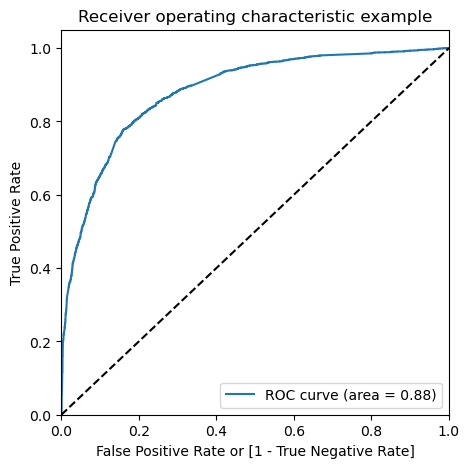

In [125]:
# Drawing ROC curve for Train Set
draw_roc(y_train_pred_final["Converted"], y_train_pred_final["Converted_Prob"])

**<font color=blue>NOTE: </font>**Area under ROC curve is 0.88 out of 1 which indicates a good predictive model

### 8.4.1 Optimal Cutoff Point/ Probability

In [126]:
# Create columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final['Converted_Prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.449527,1871,0,1,1,1,1,1,0,0,0,0,0
1,0,0.090827,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.256689,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.753938,8105,1,1,1,1,1,1,1,1,1,0,0
4,0,0.199757,3934,0,1,1,0,0,0,0,0,0,0,0


In [127]:
# Calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final["Converted"], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.615492  0.970803  0.396552
0.2   0.2  0.752783  0.898216  0.663168
0.3   0.3  0.796073  0.833739  0.772864
0.4   0.4  0.815399  0.770479  0.843078
0.5   0.5  0.805813  0.660178  0.895552
0.6   0.6  0.796228  0.593674  0.921039
0.7   0.7  0.779994  0.508921  0.947026
0.8   0.8  0.759122  0.418897  0.968766
0.9   0.9  0.710266  0.256691  0.989755


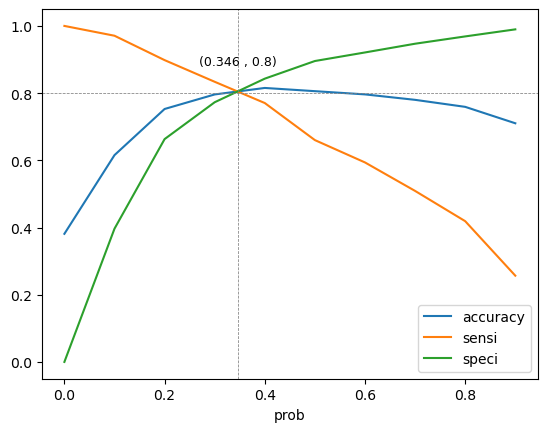

In [128]:
# Finding the intersection points of the sensitivity and accuracy curves
sensi_interp = interp1d(cutoff_df['prob'], cutoff_df['sensi'], kind='linear')
acc_interp = interp1d(cutoff_df['prob'], cutoff_df['accuracy'], kind='linear')
intersection_1 = np.round(float(fsolve(lambda x : sensi_interp(x) - acc_interp(x), 0.5)), 3)

# Find the intersection points of the specificity and accuracy curves
speci_interp = interp1d(cutoff_df['prob'], cutoff_df['speci'], kind='linear')
intersection_2 = np.round(float(fsolve(lambda x : speci_interp(x) - acc_interp(x), 0.5)), 3)

# Calculate the average of the two intersection points
intersection_x = (intersection_1 + intersection_2) / 2

# Interpolate the accuracy, sensitivity, and specificity at the intersection point
accuracy_at_intersection = np.round(float(acc_interp(intersection_x)), 2)
sensitivity_at_intersection = np.round(float(sensi_interp(intersection_x)), 2)
specificity_at_intersection = np.round(float(speci_interp(intersection_x)), 2)

# Plot the three curves and add vertical and horizontal lines at intersection point
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'])
plt.axvline(x=intersection_x, color='grey',linewidth=0.55, linestyle='--')
plt.axhline(y=accuracy_at_intersection, color='grey',linewidth=0.55, linestyle='--')

# Adding annotation to display the (x,y) intersection point coordinates 
plt.annotate(f'({intersection_x} , {accuracy_at_intersection})',
             xy=(intersection_x, accuracy_at_intersection),
             xytext=(0,20),
             textcoords='offset points',
             ha='center',
             fontsize=9)

# Displaying the plot
plt.show()

**<font color=blue>NOTE: </font>**0.346 is the approx. point where all the curves meet, so 0.346 seems to be our `Optimal cutoff point` for probability threshold .
- Lets do mapping again using optimal cutoff point 

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.346 else 0)

# deleting the unwanted columns from dataframe
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,"Predicted"],axis = 1, inplace = True) 
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.449527,1871,1
1,0,0.090827,6795,0
2,0,0.256689,3516,0
3,0,0.753938,8105,1
4,0,0.199757,3934,0


### 8.5 All Metrics

In [130]:
# Checking the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final["Converted"], y_train_pred_final["final_predicted"]))

# or can be found using confusion matrix with formula, lets find all matrix in one go ahead using UDF

0.8062770562770563


In [131]:
# UDF for all Logistic Regression Metrics
def logreg_all_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    
    accuracy = (TN+TP)/(TN+TP+FN+FP)
    sensi = TP/(TP+FN)
    speci = TN/(TN+FP)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    
    #Calculate false postive rate - predicting conversion when customer does not have converted
    FPR = FP/(FP + TN)     
    FNR = FN/(FN +TP)
    
    print ("True Negative                    : ", TN)
    print ("True Positive                    : ", TP)
    print ("False Negative                   : ", FN)
    print ("False Positve                    : ", FP) 
    
    print ("Model Accuracy                   : ", round(accuracy,4))
    print ("Model Sensitivity                : ", round(sensi,4))
    print ("Model Specificity                : ", round(speci,4))
    print ("Model Precision                  : ", round(precision,4))
    print ("Model Recall                     : ", round(recall,4))
    print ("Model True Positive Rate (TPR)   : ", round(TPR,4))
    print ("Model False Positive Rate (FPR)  : ", round(FPR,4))

In [132]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_train_pred_final['Converted'], y_train_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3235  767]
 [ 486 1980]] 

************************************************** 

True Negative                    :  3235
True Positive                    :  1980
False Negative                   :  486
False Positve                    :  767
Model Accuracy                   :  0.8063
Model Sensitivity                :  0.8029
Model Specificity                :  0.8083
Model Precision                  :  0.7208
Model Recall                     :  0.8029
Model True Positive Rate (TPR)   :  0.8029
Model False Positive Rate (FPR)  :  0.1917


************************************************** 



### 8.6 Precision and Recall tradeoff

- Let's compare all metrics of Precision-Recall view with Specificity-Sensivity view and get better probability threshold for boosting conversion rate to 80% as asked the customer.

In [133]:
# Creating precision-recall tradeoff curve

y_train_pred_final['Converted'], y_train_pred_final['final_predicted']
p, r, thresholds = precision_recall_curve(y_train_pred_final['Converted'], y_train_pred_final['Converted_Prob'])

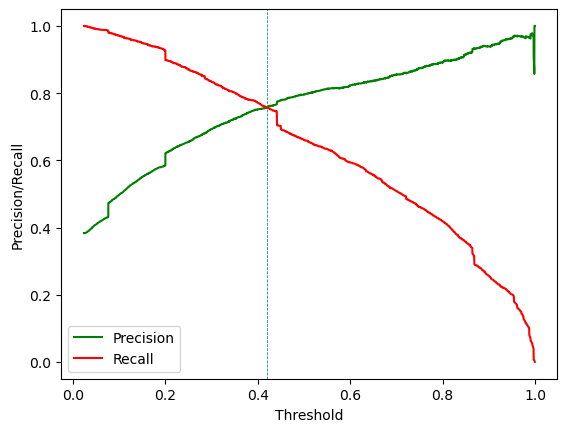

In [134]:
# plot precision-recall tradeoff curve
plt.plot(thresholds, p[:-1], "g-", label="Precision")
plt.plot(thresholds, r[:-1], "r-", label="Recall")

# add legend and axis labels

plt.axvline(x=0.42, color='teal',linewidth = 0.55, linestyle='--')
plt.legend(loc='lower left')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')

plt.show()

**<font color=blue>NOTE: </font>**The intersection point of the curve is the threshold value where the model achieves a balance between precision and recall. It can be used to optimise the performance of the model based on business requirement,Here our probability threshold is 0.42 aprrox from above curve.

In [135]:
# copying df to test model evaluation with precision recall threshold of 0.42
y_train_precision_recall = y_train_pred_final.copy()

In [136]:
# assigning a feature for 0.42 cutoff from precision recall curve to see which one is best view (sensi-speci or precision-recall)
y_train_precision_recall['precision_recall_prediction'] = y_train_precision_recall['Converted_Prob'].map( lambda x: 1 if x > 0.42 else 0)
y_train_precision_recall.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,precision_recall_prediction
0,0,0.449527,1871,1,1
1,0,0.090827,6795,0,0
2,0,0.256689,3516,0,0
3,0,0.753938,8105,1,1
4,0,0.199757,3934,0,0


In [137]:
## Lets see all matrics at 0.42 cutoff in precision-recall view and compare it with 0.346 cutoff from sensi-speci view

# Finding Confusion metrics for 'y_train_precision_recall' df
confusion_matrix = metrics.confusion_matrix(y_train_precision_recall['Converted'], y_train_precision_recall['precision_recall_prediction'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[3406  596]
 [ 600 1866]] 

************************************************** 

True Negative                    :  3406
True Positive                    :  1866
False Negative                   :  600
False Positve                    :  596
Model Accuracy                   :  0.8151
Model Sensitivity                :  0.7567
Model Specificity                :  0.8511
Model Precision                  :  0.7579
Model Recall                     :  0.7567
Model True Positive Rate (TPR)   :  0.7567
Model False Positive Rate (FPR)  :  0.1489


************************************************** 



**<font color=blue>NOTE: </font>**
- As we can see in above metrics when we used precision-recall threshold cut-off of 0.42 the values in True Positive Rate ,Sensitivity, Recall have dropped to around 76%, but we need it close to 80% as the Business Objective.
- 80% for the metrics we are getting with the sensitivity-specificity cut-off threshold of 0.346. So, we will go with sensitivity-specificity view for our Optimal cut-off for final predictions.

**<font color=purple>Assigning `Lead Score` Feature to Training dataframe: </font>**
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [138]:
# Lets add Lead Score 

y_train_pred_final['Lead_Score'] = y_train_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.449527,1871,1,45
1,0,0.090827,6795,0,9
2,0,0.256689,3516,0,26
3,0,0.753938,8105,1,75
4,0,0.199757,3934,0,20


# **<font color=brown>9. Making Predictions on Test-Set </font>** 

### 9.1 Scaling Test Dataset

In [139]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 4269 to 2960
Data columns (total 37 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   TotalVisits                               2772 non-null   float64
 1   Time Spent                                2772 non-null   float64
 2   Page Views Per Visit                      2772 non-null   float64
 3   Free Copy                                 2772 non-null   int64  
 4   Lead Origin_Landing Page Submission       2772 non-null   uint8  
 5   Lead Source_Google                        2772 non-null   uint8  
 6   Lead Source_Olark Chat                    2772 non-null   uint8  
 7   Lead Source_Organic Search                2772 non-null   uint8  
 8   Lead Source_Others                        2772 non-null   uint8  
 9   Lead Source_Reference                     2772 non-null   uint8  
 10  Lead Source_Referral Sites       

In [140]:
# fetching numerical columns from dataframe for scaling
num_cols=X_test.select_dtypes(include=['int64','float64']).columns

# scaling columns
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_test = X_test[rfe_col]
X_test.head()

,TotalVisits,Time Spent,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Others,Last Activity_SMS Sent,Specialization_Not Specified,Current Occupation_Working Professional
4269,1.672735,0.964504,2.117849,0,0,0,0,0,0,0,1,1,0
2376,-1.122305,-0.885371,-1.266675,0,0,0,1,0,0,0,1,1,0
7766,0.624595,-0.777416,1.553761,0,1,0,0,0,0,0,0,0,1
9199,-1.122305,-0.885371,-1.266675,0,0,1,0,0,0,0,0,1,0
4359,-1.122305,-0.885371,-1.266675,0,0,0,1,0,1,0,0,0,0


### 9.2 Prediction on Test Dataset using final model

In [141]:
# Adding contant value
X_test_sm = sm.add_constant(X_test)
X_test_sm.shape

(2772, 14)

In [142]:
# making prediction using model 4 (final model)
y_test_pred = logm8.predict(X_test_sm)

In [143]:
# top 10 columns
y_test_pred[:10]

4269    0.614412
2376    0.864155
7766    0.604862
9199    0.076231
4359    0.868198
9186    0.465960
1631    0.390911
8963    0.184367
8007    0.065217
5324    0.319636
dtype: float64

In [144]:
# Changing to dataframe of predicted probability
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred.head()

,0
4269,0.614412
2376,0.864155
7766,0.604862
9199,0.076231
4359,0.868198


In [145]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Converted
4269,1
2376,1
7766,1
9199,0
4359,1


In [146]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append them side by side 
y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_test_pred
y_pred_final = pd.concat([y_test_df, y_test_pred],axis=1)
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.614412
1,1,2376,0.864155
2,1,7766,0.604862
3,0,9199,0.076231
4,1,4359,0.868198


In [147]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Prospect ID','Converted','Converted_Prob'], axis=1)

y_pred_final.head()

,Prospect ID,Converted,Converted_Prob
0,4269,1,0.614412
1,2376,1,0.864155
2,7766,1,0.604862
3,9199,0,0.076231
4,4359,1,0.868198


In [148]:
# taking sensitivity-specificity method at 0.372 probability cutoff during training

y_pred_final['final_predicted'] = y_pred_final['Converted_Prob'].map(lambda x: 1 if x > 0.346 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted
0,4269,1,0.614412,1
1,2376,1,0.864155,1
2,7766,1,0.604862,1
3,9199,0,0.076231,0
4,4359,1,0.868198,1


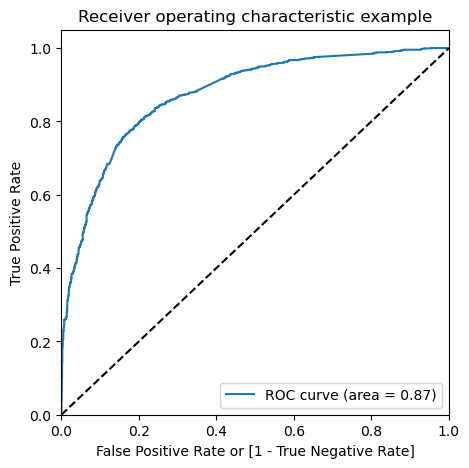

In [149]:
# Drawing ROC curve for Test Set
fpr, tpr, thresholds = metrics.roc_curve(y_pred_final["Converted"], y_pred_final["Converted_Prob"], drop_intermediate = False )

draw_roc(y_pred_final["Converted"], y_pred_final["Converted_Prob"])

**<font color=blue>NOTE: </font>**Area under ROC curve is 0.87 out of 1 which indicates a good predictive model

- Now that the final predictions have been made, the next step would be to evaluate the performance of the predictive model on a test set. 
- We will do this by comparing the predicted labels (final_predicted) to the actual labels (Converted) to compute various performance metrics such as accuracy, precision, recall, etc.


### 9.3 Test set Model Evaluation


- Calculating all metrics using confusion matrix for Test set

In [150]:
# Finding Confusion metrics for 'y_train_pred_final' df
confusion_matrix = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final['final_predicted'])
print("*"*50,"\n")

#
print("Confusion Matrix")
print(confusion_matrix,"\n")

print("*"*50,"\n")

# Using UDF to calculate all metrices of logistic regression
logreg_all_metrics(confusion_matrix)

print("\n")
print("*"*50,"\n")

************************************************** 

Confusion Matrix
[[1351  326]
 [ 231  864]] 

************************************************** 

True Negative                    :  1351
True Positive                    :  864
False Negative                   :  231
False Positve                    :  326
Model Accuracy                   :  0.7991
Model Sensitivity                :  0.789
Model Specificity                :  0.8056
Model Precision                  :  0.7261
Model Recall                     :  0.789
Model True Positive Rate (TPR)   :  0.789
Model False Positive Rate (FPR)  :  0.1944


************************************************** 



**<font color=blue>NOTE: </font>**
The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.
- `For Test set`
    - Accuracy : 79.91% ≈ 80%
    - Sensitivity : 78.90% ≈ 80%
    - Specificity : 80.56%
    
These matrics are very close to train set, so out final model logm8 is  performing with good consistency on both Train & Test set

In [151]:
# features and their coefficicent from final model

parameters=logm8.params.sort_values(ascending=False)
parameters

Lead Source_Welingak Website               5.590785
Lead Source_Reference                      3.084987
Current Occupation_Working Professional    2.707310
Last Activity_SMS Sent                     2.257228
Last Activity_Others                       1.618344
Last Activity_Email Opened                 1.106876
Time Spent                                 1.039809
Lead Source_Olark Chat                     0.997285
TotalVisits                                0.370525
Lead Source_Google                         0.314433
Page Views Per Visit                      -0.371843
Lead Origin_Landing Page Submission       -1.083886
Specialization_Not Specified              -1.185230
const                                     -1.441289
dtype: float64

**<font color=blue>NOTE: </font>**
 A high positive coefficient indicates that a variable has a stronger influence on predicting the probability of leads converting to take up X-Education's course.

**<font color=purple>Assigning `Lead Score` Feature to Test dataframe: </font>**
- A higher score would mean that the lead is hot, i.e. is most likely to convert 
- Whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [152]:
# Add Lead Score 

y_pred_final['Lead_Score'] = y_pred_final['Converted_Prob'].map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Prob,final_predicted,Lead_Score
0,4269,1,0.614412,1,61
1,2376,1,0.864155,1,86
2,7766,1,0.604862,1,60
3,9199,0,0.076231,0,8
4,4359,1,0.868198,1,87


**<font color=purple>Lead Score: </font>**Lead Score is assigned to the customers

- The customers with a higher lead score have a higher conversion chance 
- The customers with a lower lead score have a lower conversion chance.

# <font color=Brown>Conclusion </font> 🎯

##  Train - Test 📌
### <font color=purple>Train Data Set:</font>            

- <font color=Green>Accuracy:</font> 80.63%

- <font color=Green>Sensitivity:</font> 80.29%

- <font color=Green>Specificity:</font> 80.83%

### <font color=purple>Test Data Set:</font> 

- <font color=Green>>Accuracy:</font> 79.91% ≈ 80%

- <font color=Green>Sensitivity:</font> 78.90% ≈ 79%

- <font color=Green>Specificity:</font> 80.56%
 

<font color=Blue>NOTE:</font> The evaluation matrics are pretty close to each other so it indicates that the model is performing consistently across different evaluation metrics in both test and train dataset.

- The model achieved a `sensitivity of 80.29%` in the train set and 78.90% in the test set, using a cut-off value of 0.346.
- Sensitivity in this case indicates how many leads the model identify correctly out of all potential leads which are converting
- `The CEO of X Education had set a target sensitivity of around 80%.`
- The model also achieved an accuracy of 80.63%, which is in line with the study's objectives.
<hr/>

# **<font color=brown>Recommendations </font>**  ✅

### **<font color=purple>To increase our Lead Conversion Rates: </font>**  

- Focus on features with positive coefficients for targeted marketing strategies.
- Develop strategies to attract high-quality leads from top-performing lead sources.
- Engage working professionals with tailored messaging.
- Optimize communication channels based on lead engagement impact.
- More budget/spend can be done on Welingak Website in terms of advertising, etc.
- Incentives/discounts for providing reference that convert to lead, encourage providing more references.
- Working professionals to be aggressively targeted as they have high conversion rate and will have better financial situation to pay higher fees too. 


### **<font color=purple>To identify areas of improvement: </font>**  

- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.

**<font color=purple>PREPARED BY: </font>**
<br>
<font color=black> Vandit Sardana <br> Saras Sangle <br> Santosh </font>

                                                            ***